In [2]:
import pandas as pd
import glob

In [5]:
files = glob.glob('shoescsv/*.csv')

In [6]:
len(files)

21

In [7]:
import os
df = pd.DataFrame()
for file in files:
    try:
        #Skip the rows that have too many columns, which we do not want 
        dftoappend = pd.read_csv(file, on_bad_lines='skip') 
        df = df.append(dftoappend)
        df.to_csv('shoe.csv')
    except:
        dftoappend.head(20)
        print("There was an error file: ", file)

In [3]:
df = pd.read_csv("shoe.csv")

In [4]:
df.shape

(4234, 13)

In [5]:
df.head(20)

,Unnamed: 0,shoeName,brand,styleID,retailPrice,lowestResellPrice_StockX,lowestResellPrice_Goat,lowestResellPrice_flightClub,id,silhoutte,Colorway,releaseDate,description
0,0,ASICS Gel-Lyte V Kith Salmon Toe,ASICS,1201A542-700,165,100,130,103,6374feabeae4ab372ce3e546,ASICS Gel-Lyte V,Blue/Salmon,2021-11-24,To help celebrate the New York retailer's 10t...
1,1,ASICS Gel-Kayano 21 Awake NY Grey,ASICS,1201A459-020,180,213,175,175,6374feabeae4ab372ce3e547,ASICS Gel-Kayano 21,Grey/White,2021-12-02,Inspired by the New York streetwear brand's c...
2,2,ASICS Gel-Chappal GmbH Black,ASICS,1201A098-001,255,258,616,616,6374feabeae4ab372ce3e54f,ASICS Gel-Chappal,Black/Black,2020-12-10,ASICS teamed up with the Berlin fashion label...
3,3,ASICS Gel-Lyte III Sean Wotherspoon x atmos,ASICS,1203A019-000,165,198,165,165,6374feabeae4ab372ce3e553,ASICS Gel-Lyte III,Multi,2020-06-27,A collaborative look Sean Wotherspoon x Atmos...
4,4,ASICS Gel-Kayano 26 Vivienne Westwood Black,ASICS,1021A320-001,228,107,160,160,6374feabeae4ab372ce3e554,ASICS Gel-Kayano 26,Black/Black,2020-09-28,Inspired by Vivienne Westwood's 1983 Buffalo ...
5,5,ASICS Gel-1090 A Bathing Ape Tiger Camo,ASICS,1023A061-200,140,226,149,149,6374feabeae4ab372ce3e559,ASICS Gel-1090,Khaki Green/Yellow/Red,2021-06-26,Made with the help of the Japanese streetwear...
6,6,ASICS Gel-Kayano 14 White Pure Gold,ASICS,1201A019-102,150,152,137,137,6374feabeae4ab372ce3e55b,ASICS Gel-Kayano 14,White/Pure Gold,2021-01-12,The Gel Kayano 14 'White Pure Gold' brings el...
7,7,ASICS Gel-Lyte III OG Changing of the Seasons ...,ASICS,1201A296-300,120,107,127,127,6374feabeae4ab372ce3e55d,ASICS Gel-Lyte III OG,Lichen Rock/Edible Moss,2021-10-13,The ASICS Gel Lyte 3 OG 'Momijigari Natsu' is...
8,8,ASICS Gel-Kayano 27 LTX Vivienne Westwood Citrus,ASICS,1201A115.800,240,124,75,75,6374feabeae4ab372ce3e560,ASICS Gel-Kayano 27 LTX,Citrus/Black,2021-04-10,ASICS teamed up with the British fashion desi...
9,9,ASICS Gel-Nandi 360 GmbH Skylight,ASICS,1021A415-401,180,125,135,135,6374feabeae4ab372ce3e563,ASICS Gel-Nandi 360,Skylight/Skylight,2020-06-27,The GmbH x Gel Nandi 360 'Skylight' released ...


In [6]:
#drop duplicates
df = df.drop_duplicates()

In [7]:
df.shape

(4234, 13)

In [8]:
#Remove white spaces
data_no_white_space = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [9]:
data_no_white_space.columns

Index(['Unnamed: 0', 'shoeName', ' brand', ' styleID', ' retailPrice',
       ' lowestResellPrice_StockX', ' lowestResellPrice_Goat',
       ' lowestResellPrice_flightClub', ' id', ' silhoutte', ' Colorway',
       ' releaseDate', ' description'],
      dtype='object')

In [10]:
data_no_white_space.columns = data_no_white_space.columns.str.replace(' ', '')

In [11]:
df = data_no_white_space

In [12]:
df

,Unnamed:0,shoeName,brand,styleID,retailPrice,lowestResellPrice_StockX,lowestResellPrice_Goat,lowestResellPrice_flightClub,id,silhoutte,Colorway,releaseDate,description
0,0,ASICS Gel-Lyte V Kith Salmon Toe,ASICS,1201A542-700,165,100,130,103,6374feabeae4ab372ce3e546,ASICS Gel-Lyte V,Blue/Salmon,2021-11-24,To help celebrate the New York retailer's 10th...
1,1,ASICS Gel-Kayano 21 Awake NY Grey,ASICS,1201A459-020,180,213,175,175,6374feabeae4ab372ce3e547,ASICS Gel-Kayano 21,Grey/White,2021-12-02,Inspired by the New York streetwear brand's co...
2,2,ASICS Gel-Chappal GmbH Black,ASICS,1201A098-001,255,258,616,616,6374feabeae4ab372ce3e54f,ASICS Gel-Chappal,Black/Black,2020-12-10,ASICS teamed up with the Berlin fashion label ...
3,3,ASICS Gel-Lyte III Sean Wotherspoon x atmos,ASICS,1203A019-000,165,198,165,165,6374feabeae4ab372ce3e553,ASICS Gel-Lyte III,Multi,2020-06-27,A collaborative look Sean Wotherspoon x Atmos ...
4,4,ASICS Gel-Kayano 26 Vivienne Westwood Black,ASICS,1021A320-001,228,107,160,160,6374feabeae4ab372ce3e554,ASICS Gel-Kayano 26,Black/Black,2020-09-28,Inspired by Vivienne Westwood's 1983 Buffalo c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229,457,adidas Yeezy Slide Pure (First Release),adidas,GZ5554,55,141,139,133,6374fd9603a96e36ed3d43e8,adidas Yeezy Slide,Pure/Pure/Pure,2021-04-26,The Yeezy Slides 'Pure' brings a neutral look ...
4230,458,Jordan 3 Retro Racer Blue,Jordan,CT8532-145,190,211,250,200,6374fd9603a96e36ed3d43e9,Jordan 3 Retro,White/Black-Cement Grey-Racer Blue,2021-07-10,Featuring 'Fire Red'-style color-blocking the ...
4231,459,Jordan 1 Mid SE Grey Green,Jordan,DC7294-103,120,160,146,134,6374fd9603a96e36ed3d43ea,Jordan 1 Mid SE,White/Neutral Grey-Lucky Green,2021-11-17,Molded after the 1985 original silhouette is t...
4232,460,Jordan 1 Mid Tan Gum,Jordan,554724-271,120,158,136,136,6374fd9603a96e36ed3d43eb,Jordan 1 Mid,Hemp/Gum Yellow/White,2021-09-03,The Air Jordan 1 Mid 'Tan Gum' displays a new ...


In [13]:
df.reset_index(inplace = True)

In [14]:
df.pop("index")

0          0
1          1
2          2
3          3
4          4
        ... 
4229    4229
4230    4230
4231    4231
4232    4232
4233    4233
Name: index, Length: 4234, dtype: int64

In [15]:
df

,Unnamed:0,shoeName,brand,styleID,retailPrice,lowestResellPrice_StockX,lowestResellPrice_Goat,lowestResellPrice_flightClub,id,silhoutte,Colorway,releaseDate,description
0,0,ASICS Gel-Lyte V Kith Salmon Toe,ASICS,1201A542-700,165,100,130,103,6374feabeae4ab372ce3e546,ASICS Gel-Lyte V,Blue/Salmon,2021-11-24,To help celebrate the New York retailer's 10th...
1,1,ASICS Gel-Kayano 21 Awake NY Grey,ASICS,1201A459-020,180,213,175,175,6374feabeae4ab372ce3e547,ASICS Gel-Kayano 21,Grey/White,2021-12-02,Inspired by the New York streetwear brand's co...
2,2,ASICS Gel-Chappal GmbH Black,ASICS,1201A098-001,255,258,616,616,6374feabeae4ab372ce3e54f,ASICS Gel-Chappal,Black/Black,2020-12-10,ASICS teamed up with the Berlin fashion label ...
3,3,ASICS Gel-Lyte III Sean Wotherspoon x atmos,ASICS,1203A019-000,165,198,165,165,6374feabeae4ab372ce3e553,ASICS Gel-Lyte III,Multi,2020-06-27,A collaborative look Sean Wotherspoon x Atmos ...
4,4,ASICS Gel-Kayano 26 Vivienne Westwood Black,ASICS,1021A320-001,228,107,160,160,6374feabeae4ab372ce3e554,ASICS Gel-Kayano 26,Black/Black,2020-09-28,Inspired by Vivienne Westwood's 1983 Buffalo c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229,457,adidas Yeezy Slide Pure (First Release),adidas,GZ5554,55,141,139,133,6374fd9603a96e36ed3d43e8,adidas Yeezy Slide,Pure/Pure/Pure,2021-04-26,The Yeezy Slides 'Pure' brings a neutral look ...
4230,458,Jordan 3 Retro Racer Blue,Jordan,CT8532-145,190,211,250,200,6374fd9603a96e36ed3d43e9,Jordan 3 Retro,White/Black-Cement Grey-Racer Blue,2021-07-10,Featuring 'Fire Red'-style color-blocking the ...
4231,459,Jordan 1 Mid SE Grey Green,Jordan,DC7294-103,120,160,146,134,6374fd9603a96e36ed3d43ea,Jordan 1 Mid SE,White/Neutral Grey-Lucky Green,2021-11-17,Molded after the 1985 original silhouette is t...
4232,460,Jordan 1 Mid Tan Gum,Jordan,554724-271,120,158,136,136,6374fd9603a96e36ed3d43eb,Jordan 1 Mid,Hemp/Gum Yellow/White,2021-09-03,The Air Jordan 1 Mid 'Tan Gum' displays a new ...


In [16]:
df = df.drop_duplicates(subset=['shoeName'])

In [17]:
df

,Unnamed:0,shoeName,brand,styleID,retailPrice,lowestResellPrice_StockX,lowestResellPrice_Goat,lowestResellPrice_flightClub,id,silhoutte,Colorway,releaseDate,description
0,0,ASICS Gel-Lyte V Kith Salmon Toe,ASICS,1201A542-700,165,100,130,103,6374feabeae4ab372ce3e546,ASICS Gel-Lyte V,Blue/Salmon,2021-11-24,To help celebrate the New York retailer's 10th...
1,1,ASICS Gel-Kayano 21 Awake NY Grey,ASICS,1201A459-020,180,213,175,175,6374feabeae4ab372ce3e547,ASICS Gel-Kayano 21,Grey/White,2021-12-02,Inspired by the New York streetwear brand's co...
2,2,ASICS Gel-Chappal GmbH Black,ASICS,1201A098-001,255,258,616,616,6374feabeae4ab372ce3e54f,ASICS Gel-Chappal,Black/Black,2020-12-10,ASICS teamed up with the Berlin fashion label ...
3,3,ASICS Gel-Lyte III Sean Wotherspoon x atmos,ASICS,1203A019-000,165,198,165,165,6374feabeae4ab372ce3e553,ASICS Gel-Lyte III,Multi,2020-06-27,A collaborative look Sean Wotherspoon x Atmos ...
4,4,ASICS Gel-Kayano 26 Vivienne Westwood Black,ASICS,1021A320-001,228,107,160,160,6374feabeae4ab372ce3e554,ASICS Gel-Kayano 26,Black/Black,2020-09-28,Inspired by Vivienne Westwood's 1983 Buffalo c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,447,Nike Hot Step Air Terra Drake NOCTA White,Nike,DH4692-100,180,137,127,127,6374fd9603a96e36ed3d43c6,Nike Hot Step Air Terra,White/Chrome,2022-03-03,Pairing up with Drake's apparel brand is the N...
4223,451,adidas Superstar AEC Sean Wotherspoon Superear...,adidas,GX3823,110,61,62,62,6374fd9603a96e36ed3d43cd,adidas Superstar AEC,Core Black/Bright Yellow/Green,2021-10-22,Partnering with the co-founder of Round Two th...
4225,453,Nike Zoom Freak 3 NRG Uno Face It,Nike,DC9363-001/DC9364-001,125,86,undefined,undefined,6374fd9603a96e36ed3d43cf,Nike Zoom Freak 3 NRG,Black/Green/Blue,2022-03-10,The lower half of the Nike Zoom Freak 3 Uno Wi...
4227,455,Nike Dunk Low North Carolina A&T,Nike,DR6187-001,120,152,181,181,6374fd9603a96e36ed3d43db,Nike Dunk Low,Cool Grey/Yellow-Blue-Black-Sail,2022-10-24,Arial Robinson took inspiration from the unive...


In [18]:
df['id'].duplicated().any()

False

In [19]:
df['brand'][2]

'ASICS'

In [20]:
df['brand'].unique()

array(['ASICS', 'Asics', 'Nike', 'adidas', 'Reebok', 'Jordan',
       'New Balance', 'Off-White', 'Brooks', 'Vans', 'Puma', 'Converse',
       'Michael Kors', 'Canada Goose', 'Headdy', 'Fila', 'Saucony', 'On',
       'MSCHF', 'Golden Goose', 'Under Armour', 'Hoka One One',
       'Chalk Line', 'The Hundreds', 'Diadora', 'Crocs', 'UGG',
       'Timberland'], dtype=object)

In [21]:
for i in range(len(df['brand'])):
    if df['brand'][i] == 'ASICS':
        df['brand'][i] = "Asics"

/var/folders/f6/z0d78nj136d487t0dd3bdyh00000gn/T/ipykernel_711/3668217371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand'][i] = "Asics"


KeyError: 632

In [22]:
df['brand'].unique()

array(['Asics', 'Nike', 'adidas', 'Reebok', 'Jordan', 'New Balance',
       'Off-White', 'Brooks', 'Vans', 'Puma', 'Converse', 'Michael Kors',
       'Canada Goose', 'Headdy', 'Fila', 'Saucony', 'On', 'MSCHF',
       'Golden Goose', 'Under Armour', 'Hoka One One', 'Chalk Line',
       'The Hundreds', 'Diadora', 'Crocs', 'UGG', 'Timberland'],
      dtype=object)

In [23]:
df.columns

Index(['Unnamed:0', 'shoeName', 'brand', 'styleID', 'retailPrice',
       'lowestResellPrice_StockX', 'lowestResellPrice_Goat',
       'lowestResellPrice_flightClub', 'id', 'silhoutte', 'Colorway',
       'releaseDate', 'description'],
      dtype='object')

In [24]:
dfgroup_brand = df.groupby('brand', as_index=True).count()

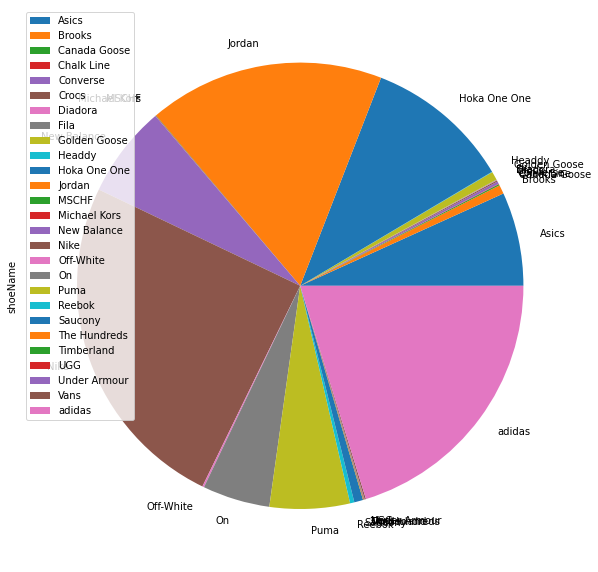

In [25]:
plot = df.groupby('brand', as_index=True).count().plot.pie(y='shoeName', figsize=(10, 20))

In [26]:
df.rename(columns={"description": "text", "id": "docno"}, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [27]:
df

,Unnamed:0,shoeName,brand,styleID,retailPrice,lowestResellPrice_StockX,lowestResellPrice_Goat,lowestResellPrice_flightClub,docno,silhoutte,Colorway,releaseDate,text
0,0,ASICS Gel-Lyte V Kith Salmon Toe,Asics,1201A542-700,165,100,130,103,6374feabeae4ab372ce3e546,ASICS Gel-Lyte V,Blue/Salmon,2021-11-24,To help celebrate the New York retailer's 10th...
1,1,ASICS Gel-Kayano 21 Awake NY Grey,Asics,1201A459-020,180,213,175,175,6374feabeae4ab372ce3e547,ASICS Gel-Kayano 21,Grey/White,2021-12-02,Inspired by the New York streetwear brand's co...
2,2,ASICS Gel-Chappal GmbH Black,Asics,1201A098-001,255,258,616,616,6374feabeae4ab372ce3e54f,ASICS Gel-Chappal,Black/Black,2020-12-10,ASICS teamed up with the Berlin fashion label ...
3,3,ASICS Gel-Lyte III Sean Wotherspoon x atmos,Asics,1203A019-000,165,198,165,165,6374feabeae4ab372ce3e553,ASICS Gel-Lyte III,Multi,2020-06-27,A collaborative look Sean Wotherspoon x Atmos ...
4,4,ASICS Gel-Kayano 26 Vivienne Westwood Black,Asics,1021A320-001,228,107,160,160,6374feabeae4ab372ce3e554,ASICS Gel-Kayano 26,Black/Black,2020-09-28,Inspired by Vivienne Westwood's 1983 Buffalo c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,447,Nike Hot Step Air Terra Drake NOCTA White,Nike,DH4692-100,180,137,127,127,6374fd9603a96e36ed3d43c6,Nike Hot Step Air Terra,White/Chrome,2022-03-03,Pairing up with Drake's apparel brand is the N...
4223,451,adidas Superstar AEC Sean Wotherspoon Superear...,adidas,GX3823,110,61,62,62,6374fd9603a96e36ed3d43cd,adidas Superstar AEC,Core Black/Bright Yellow/Green,2021-10-22,Partnering with the co-founder of Round Two th...
4225,453,Nike Zoom Freak 3 NRG Uno Face It,Nike,DC9363-001/DC9364-001,125,86,undefined,undefined,6374fd9603a96e36ed3d43cf,Nike Zoom Freak 3 NRG,Black/Green/Blue,2022-03-10,The lower half of the Nike Zoom Freak 3 Uno Wi...
4227,455,Nike Dunk Low North Carolina A&T,Nike,DR6187-001,120,152,181,181,6374fd9603a96e36ed3d43db,Nike Dunk Low,Cool Grey/Yellow-Blue-Black-Sail,2022-10-24,Arial Robinson took inspiration from the unive...


In [28]:
import pyterrier as pt
import os

In [29]:
if not pt.started():
    pt.init()

PyTerrier 0.9.1 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7

No etc/terrier.properties, using terrier.default.properties for bootstrap configuration.


In [30]:
df["retailPrice"] =  df["retailPrice"].apply(str)

/var/folders/f6/z0d78nj136d487t0dd3bdyh00000gn/T/ipykernel_711/1316881304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["retailPrice"] =  df["retailPrice"].apply(str)


In [31]:
#Using the DFIndexer 
index_dir = './shoedoc_index'
indexer = pt.DFIndexer(index_dir, overwrite=True)
index_ref = indexer.index(df["text"], df["docno"], df["shoeName"], df["brand"], df["retailPrice"], df["Colorway"],df["text"])
index_ref.toString()

22:01:14.543 [main] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (637501761cb69837c65302bc) - further warnings are suppressed
22:01:15.987 [main] WARN org.terrier.structures.indexing.Indexer - Indexed 559 empty documents


'./shoedoc_index/data.properties'

In [32]:
os.listdir(index_dir)

['data.lexicon.fsomapid',
 'data.inverted.bf',
 'data.direct.bf',
 'data.lexicon.fsomaphash',
 'data.lexicon.fsomapfile',
 'data.properties',
 'data.document.fsarrayfile',
 'data.meta-0.fsomapfile',
 'data.meta.zdata',
 'data.meta.idx']

In [33]:
index = pt.IndexFactory.of(index_ref)

In [34]:
queries = pd.read_csv("queries.csv") 
queries

,qid,query
0,1,Winter training shoes
1,2,Trail running shoes
2,3,Some good racing shoes for 5k or 10k
3,4,Shoes that can save your knees
4,5,Most popular running shoe now
5,6,I need a pair of carbon plated shoes
6,7,Brooks trainers
7,8,Adidas boost running shoes
8,9,Shoes that have wider toe box
9,10,I want a shoe that is durable and lasts long


In [35]:
# queries = queries.drop(queries.index[21:len(queries)])

In [36]:
# queries.to_csv("queries.csv")

In [37]:
tfidf = pt.BatchRetrieve(index, wmodel="TF_IDF")
bm25 = pt.BatchRetrieve(index, wmodel="BM25")
pl2 = pt.BatchRetrieve(index, wmodel="PL2")

In [38]:
tfidf.transform(queries)

,qid,docid,docno,rank,score,query
0,1,1047,6374ff50c30ceb3748b48821,0,6.518408,Winter training shoes
1,1,122,6374feabeae4ab372ce3e68f,1,6.077807,Winter training shoes
2,1,2274,6374ff48c30ceb3748b4822a,2,5.813863,Winter training shoes
3,1,1746,6374fd8803a96e36ed3d3e0d,3,5.620763,Winter training shoes
4,1,395,6374ff4bc30ceb3748b4859e,4,5.239373,Winter training shoes
...,...,...,...,...,...,...
19013,20,616,6374fd7403a96e36ed3d388d,995,0.822457,Kobe signature shoes
19014,20,677,6374fd6e03a96e36ed3d34a2,996,0.822457,Kobe signature shoes
19015,20,689,6374fd6e03a96e36ed3d34cb,997,0.822457,Kobe signature shoes
19016,20,752,6374ff50c30ceb3748b48602,998,0.822457,Kobe signature shoes


In [39]:
queries

,qid,query
0,1,Winter training shoes
1,2,Trail running shoes
2,3,Some good racing shoes for 5k or 10k
3,4,Shoes that can save your knees
4,5,Most popular running shoe now
5,6,I need a pair of carbon plated shoes
6,7,Brooks trainers
7,8,Adidas boost running shoes
8,9,Shoes that have wider toe box
9,10,I want a shoe that is durable and lasts long


In [40]:
tfidf.transform(queries)
bm25.transform(queries)
pl2.transform(queries)

,qid,docid,docno,rank,score,query
0,1,1047,6374ff50c30ceb3748b48821,0,6.005245,Winter training shoes
1,1,122,6374feabeae4ab372ce3e68f,1,5.567792,Winter training shoes
2,1,2274,6374ff48c30ceb3748b4822a,2,5.298477,Winter training shoes
3,1,1746,6374fd8803a96e36ed3d3e0d,3,5.133581,Winter training shoes
4,1,2895,6374feb3eae4ab372ce3eae7,4,4.665518,Winter training shoes
...,...,...,...,...,...,...
19013,20,677,6374fd6e03a96e36ed3d34a2,995,0.707130,Kobe signature shoes
19014,20,689,6374fd6e03a96e36ed3d34cb,996,0.707130,Kobe signature shoes
19015,20,752,6374ff50c30ceb3748b48602,997,0.707130,Kobe signature shoes
19016,20,813,6374ff50c30ceb3748b48661,998,0.707130,Kobe signature shoes


In [41]:
tfidf.transform(queries).groupby('qid').head(70)

,qid,docid,docno,rank,score,query
0,1,1047,6374ff50c30ceb3748b48821,0,6.518408,Winter training shoes
1,1,122,6374feabeae4ab372ce3e68f,1,6.077807,Winter training shoes
2,1,2274,6374ff48c30ceb3748b4822a,2,5.813863,Winter training shoes
3,1,1746,6374fd8803a96e36ed3d3e0d,3,5.620763,Winter training shoes
4,1,395,6374ff4bc30ceb3748b4859e,4,5.239373,Winter training shoes
...,...,...,...,...,...,...
18083,20,822,6374ff50c30ceb3748b48677,65,2.794640,Kobe signature shoes
18084,20,856,6374ff50c30ceb3748b486b3,66,2.794640,Kobe signature shoes
18085,20,1010,6374ff50c30ceb3748b487e5,67,2.794640,Kobe signature shoes
18086,20,1144,6374ff50c30ceb3748b488d0,68,2.794640,Kobe signature shoes


In [42]:
top_tfidf = tfidf.transform(queries).groupby('qid').head(50)
top_bm25 = bm25.transform(queries).groupby('qid').head(50)
top_pl2 = pl2.transform(queries).groupby('qid').head(50)

In [43]:
combined_df = pd.concat([top_tfidf,top_bm25,top_pl2])

In [44]:
combined_df

,qid,docid,docno,rank,score,query
0,1,1047,6374ff50c30ceb3748b48821,0,6.518408,Winter training shoes
1,1,122,6374feabeae4ab372ce3e68f,1,6.077807,Winter training shoes
2,1,2274,6374ff48c30ceb3748b4822a,2,5.813863,Winter training shoes
3,1,1746,6374fd8803a96e36ed3d3e0d,3,5.620763,Winter training shoes
4,1,395,6374ff4bc30ceb3748b4859e,4,5.239373,Winter training shoes
...,...,...,...,...,...,...
18063,20,734,6374ff50c30ceb3748b485e2,45,2.472342,Kobe signature shoes
18064,20,758,6374ff50c30ceb3748b4860b,46,2.472342,Kobe signature shoes
18065,20,838,6374ff50c30ceb3748b48691,47,2.472342,Kobe signature shoes
18066,20,986,6374ff50c30ceb3748b487af,48,2.472342,Kobe signature shoes


In [45]:
combined_df = combined_df

In [46]:
combined_df.groupby('qid').count()

,docid,docno,rank,score,query
qid,,,,,
1,150,150,150,150,150
10,150,150,150,150,150
11,150,150,150,150,150
12,150,150,150,150,150
13,150,150,150,150,150
14,150,150,150,150,150
15,150,150,150,150,150
16,150,150,150,150,150
17,150,150,150,150,150


In [47]:
df

,Unnamed:0,shoeName,brand,styleID,retailPrice,lowestResellPrice_StockX,lowestResellPrice_Goat,lowestResellPrice_flightClub,docno,silhoutte,Colorway,releaseDate,text
0,0,ASICS Gel-Lyte V Kith Salmon Toe,Asics,1201A542-700,165,100,130,103,6374feabeae4ab372ce3e546,ASICS Gel-Lyte V,Blue/Salmon,2021-11-24,To help celebrate the New York retailer's 10th...
1,1,ASICS Gel-Kayano 21 Awake NY Grey,Asics,1201A459-020,180,213,175,175,6374feabeae4ab372ce3e547,ASICS Gel-Kayano 21,Grey/White,2021-12-02,Inspired by the New York streetwear brand's co...
2,2,ASICS Gel-Chappal GmbH Black,Asics,1201A098-001,255,258,616,616,6374feabeae4ab372ce3e54f,ASICS Gel-Chappal,Black/Black,2020-12-10,ASICS teamed up with the Berlin fashion label ...
3,3,ASICS Gel-Lyte III Sean Wotherspoon x atmos,Asics,1203A019-000,165,198,165,165,6374feabeae4ab372ce3e553,ASICS Gel-Lyte III,Multi,2020-06-27,A collaborative look Sean Wotherspoon x Atmos ...
4,4,ASICS Gel-Kayano 26 Vivienne Westwood Black,Asics,1021A320-001,228,107,160,160,6374feabeae4ab372ce3e554,ASICS Gel-Kayano 26,Black/Black,2020-09-28,Inspired by Vivienne Westwood's 1983 Buffalo c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,447,Nike Hot Step Air Terra Drake NOCTA White,Nike,DH4692-100,180,137,127,127,6374fd9603a96e36ed3d43c6,Nike Hot Step Air Terra,White/Chrome,2022-03-03,Pairing up with Drake's apparel brand is the N...
4223,451,adidas Superstar AEC Sean Wotherspoon Superear...,adidas,GX3823,110,61,62,62,6374fd9603a96e36ed3d43cd,adidas Superstar AEC,Core Black/Bright Yellow/Green,2021-10-22,Partnering with the co-founder of Round Two th...
4225,453,Nike Zoom Freak 3 NRG Uno Face It,Nike,DC9363-001/DC9364-001,125,86,undefined,undefined,6374fd9603a96e36ed3d43cf,Nike Zoom Freak 3 NRG,Black/Green/Blue,2022-03-10,The lower half of the Nike Zoom Freak 3 Uno Wi...
4227,455,Nike Dunk Low North Carolina A&T,Nike,DR6187-001,120,152,181,181,6374fd9603a96e36ed3d43db,Nike Dunk Low,Cool Grey/Yellow-Blue-Black-Sail,2022-10-24,Arial Robinson took inspiration from the unive...


In [48]:
right_df = df[["text","docno","shoeName", "lowestResellPrice_StockX"]]

In [49]:
right_df.drop_duplicates()

,text,docno,shoeName,lowestResellPrice_StockX
0,To help celebrate the New York retailer's 10th...,6374feabeae4ab372ce3e546,ASICS Gel-Lyte V Kith Salmon Toe,100
1,Inspired by the New York streetwear brand's co...,6374feabeae4ab372ce3e547,ASICS Gel-Kayano 21 Awake NY Grey,213
2,ASICS teamed up with the Berlin fashion label ...,6374feabeae4ab372ce3e54f,ASICS Gel-Chappal GmbH Black,258
3,A collaborative look Sean Wotherspoon x Atmos ...,6374feabeae4ab372ce3e553,ASICS Gel-Lyte III Sean Wotherspoon x atmos,198
4,Inspired by Vivienne Westwood's 1983 Buffalo c...,6374feabeae4ab372ce3e554,ASICS Gel-Kayano 26 Vivienne Westwood Black,107
...,...,...,...,...
4219,Pairing up with Drake's apparel brand is the N...,6374fd9603a96e36ed3d43c6,Nike Hot Step Air Terra Drake NOCTA White,137
4223,Partnering with the co-founder of Round Two th...,6374fd9603a96e36ed3d43cd,adidas Superstar AEC Sean Wotherspoon Superear...,61
4225,The lower half of the Nike Zoom Freak 3 Uno Wi...,6374fd9603a96e36ed3d43cf,Nike Zoom Freak 3 NRG Uno Face It,86
4227,Arial Robinson took inspiration from the unive...,6374fd9603a96e36ed3d43db,Nike Dunk Low North Carolina A&T,152


In [50]:
df_toannotate = combined_df.merge(right_df, on='docno', how='left')

In [52]:
df_toannotate.to_csv('shoe_annotate2.csv')

In [51]:
annotated = pd.read_csv('shoe_annotate _with_rating.csv', on_bad_lines='skip') 

In [52]:
annotated

,Unnamed: 0,qid,docid,docno,rank,score,text,shoeName,query,relevance score
0,0,1,1047,6374ff50c30ceb3748b48821,0,6.518408,The Air Jordan 4 Winter 'Loyal Blue' brings a ...,Jordan 4 Retro Winterized Loyal Blue,Winter training shoes,1
1,1,1,122,6374feabeae4ab372ce3e68f,1,6.077807,A collaboration between ASICS and Spanish reta...,ASICS Gel-Lyte III 24 Kilates Express,Winter training shoes,0
2,2,1,2274,6374ff48c30ceb3748b4822a,2,5.813863,The Riccardo Tisci x NikeLab Free Train Force ...,Nike Free Train Force Flyknit Tisci Multi-Color,Winter training shoes,0
3,3,1,1746,6374fd8803a96e36ed3d3e0d,3,5.620763,The Game of Thrones x UltraBoost 4.0 'House St...,adidas Ultra Boost 4.0 Game of Thrones House S...,Winter training shoes,2
4,4,1,395,6374ff4bc30ceb3748b4859e,4,5.239373,The Air Zoom Tempo NEXT% Flyknit 'Black White ...,Nike Air Zoom Tempo Next% Flyknit Black White,Winter training shoes,0
...,...,...,...,...,...,...,...,...,...,...
2899,2899,20,734,6374ff50c30ceb3748b485e2,45,2.472342,The Air Jordan 1 Mid 'Smoke Grey' brings a sub...,Jordan 1 Mid Light Smoke Grey,Kobe signature shoes,0
2900,2900,20,758,6374ff50c30ceb3748b4860b,46,2.472342,The Air Jordan 1 Low SE 'Diamond' displays a n...,Jordan 1 Low Diamond Shorts,Kobe signature shoes,0
2901,2901,20,838,6374ff50c30ceb3748b48691,47,2.472342,The Air Jordan 1 Mid 'Triple Black' gives a ne...,Jordan 1 Mid Triple Black,Kobe signature shoes,0
2902,2902,20,986,6374ff50c30ceb3748b487af,48,2.472342,The Air Jordan 13 Retro 'Flint' 2020 released ...,Jordan 13 Retro Flint (2020),Kobe signature shoes,0


In [53]:
#Change relevance score column name to label
annotated = annotated.rename(columns={'relevance score': 'label'})

In [54]:
annotated_drop = annotated.drop_duplicates(subset=['qid','docid','docno','query'])

In [55]:
annotated_drop = annotated.drop_duplicates(subset=['qid','docid','docno','query'])

In [56]:
annotated_drop.groupby('qid').count()

,Unnamed: 0,docid,docno,rank,score,text,shoeName,query,label
qid,,,,,,,,,
1,50,50,50,50,50,50,50,50,50
2,60,60,60,60,60,60,60,60,60
3,50,50,50,50,50,50,50,50,50
4,61,61,61,61,61,61,61,61,61
5,59,59,59,59,59,59,59,59,59
6,52,52,52,52,52,52,52,51,52
7,18,18,18,18,18,18,18,18,18
8,62,62,62,62,62,62,62,62,62
9,69,69,69,69,69,69,69,69,69


In [57]:
queries.head()

,qid,query
0,1,Winter training shoes
1,2,Trail running shoes
2,3,Some good racing shoes for 5k or 10k
3,4,Shoes that can save your knees
4,5,Most popular running shoe now


In [58]:
annotated

,Unnamed: 0,qid,docid,docno,rank,score,text,shoeName,query,label
0,0,1,1047,6374ff50c30ceb3748b48821,0,6.518408,The Air Jordan 4 Winter 'Loyal Blue' brings a ...,Jordan 4 Retro Winterized Loyal Blue,Winter training shoes,1
1,1,1,122,6374feabeae4ab372ce3e68f,1,6.077807,A collaboration between ASICS and Spanish reta...,ASICS Gel-Lyte III 24 Kilates Express,Winter training shoes,0
2,2,1,2274,6374ff48c30ceb3748b4822a,2,5.813863,The Riccardo Tisci x NikeLab Free Train Force ...,Nike Free Train Force Flyknit Tisci Multi-Color,Winter training shoes,0
3,3,1,1746,6374fd8803a96e36ed3d3e0d,3,5.620763,The Game of Thrones x UltraBoost 4.0 'House St...,adidas Ultra Boost 4.0 Game of Thrones House S...,Winter training shoes,2
4,4,1,395,6374ff4bc30ceb3748b4859e,4,5.239373,The Air Zoom Tempo NEXT% Flyknit 'Black White ...,Nike Air Zoom Tempo Next% Flyknit Black White,Winter training shoes,0
...,...,...,...,...,...,...,...,...,...,...
2899,2899,20,734,6374ff50c30ceb3748b485e2,45,2.472342,The Air Jordan 1 Mid 'Smoke Grey' brings a sub...,Jordan 1 Mid Light Smoke Grey,Kobe signature shoes,0
2900,2900,20,758,6374ff50c30ceb3748b4860b,46,2.472342,The Air Jordan 1 Low SE 'Diamond' displays a n...,Jordan 1 Low Diamond Shorts,Kobe signature shoes,0
2901,2901,20,838,6374ff50c30ceb3748b48691,47,2.472342,The Air Jordan 1 Mid 'Triple Black' gives a ne...,Jordan 1 Mid Triple Black,Kobe signature shoes,0
2902,2902,20,986,6374ff50c30ceb3748b487af,48,2.472342,The Air Jordan 13 Retro 'Flint' 2020 released ...,Jordan 13 Retro Flint (2020),Kobe signature shoes,0


In [59]:
qrels = annotated[['qid','docno','label']]
qrels

,qid,docno,label
0,1,6374ff50c30ceb3748b48821,1
1,1,6374feabeae4ab372ce3e68f,0
2,1,6374ff48c30ceb3748b4822a,0
3,1,6374fd8803a96e36ed3d3e0d,2
4,1,6374ff4bc30ceb3748b4859e,0
...,...,...,...
2899,20,6374ff50c30ceb3748b485e2,0
2900,20,6374ff50c30ceb3748b4860b,0
2901,20,6374ff50c30ceb3748b48691,0
2902,20,6374ff50c30ceb3748b487af,0


In [60]:
qrels.qid = qrels.qid.astype(str)
qrels.qid

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0        1
1        1
2        1
3        1
4        1
        ..
2899    20
2900    20
2901    20
2902    20
2903    20
Name: qid, Length: 2904, dtype: object

In [61]:
tfidf

BR(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'TF_IDF'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDecorator,filters:LocalManager$PostFilterProcess,decorate:SimpleDecorateProcess', 'querying.postfilters': 'decorate:SimpleDecorate,site:SiteFilter,scope:Scope', 'querying.default.controls': 'wmodel:DPH,parsecontrols:on,parseql:on,applypipeline:on,terrierql:on,localmatching:on,filters:on,decorate:on', 'querying.allowed.controls': 'scope,qe,qemodel,start,end,site,scope,applypipeline', 'termpipelines': 'Stopwords,PorterStemm

In [62]:
from pyterrier.measures import *
pt.Experiment(
    [tfidf,bm25,pl2],
    queries,
    qrels,
    eval_metrics=["map", "ndcg","recip_rank",nDCG@5,nDCG@10])

,name,map,ndcg,recip_rank,nDCG@5,nDCG@10
0,BR(TF_IDF),0.792349,0.855280,0.9375,0.675040,0.685432
1,BR(BM25),0.811296,0.856635,0.9375,0.670695,0.681346
2,BR(PL2),0.802175,0.858312,0.9375,0.685920,0.683871


# Build more complex pipelines

In [64]:
KLQE = pt.rewrite.KLQueryExpansion(index)

In [65]:
# pipelineSDM = sdm >> bm25
pipelineQE = bm25 >> KLQE >> bm25

In [66]:
queries

,qid,query
0,1,Winter training shoes
1,2,Trail running shoes
2,3,Some good racing shoes for 5k or 10k
3,4,Shoes that can save your knees
4,5,Most popular running shoe now
5,6,I need a pair of carbon plated shoes
6,7,Brooks trainers
7,8,Adidas boost running shoes
8,9,Shoes that have wider toe box
9,10,I want a shoe that is durable and lasts long


In [67]:
pipelineQE(queries)

,qid,docid,docno,rank,score,query_0,query
0,1,122,6374feabeae4ab372ce3e68f,0,12.420596,Winter training shoes,applypipeline:off winter^1.323480571 train^1.8...
1,1,2274,6374ff48c30ceb3748b4822a,1,11.615859,Winter training shoes,applypipeline:off winter^1.323480571 train^1.8...
2,1,1390,6374fd7803a96e36ed3d3bd2,2,8.159794,Winter training shoes,applypipeline:off winter^1.323480571 train^1.8...
3,1,1047,6374ff50c30ceb3748b48821,3,7.980552,Winter training shoes,applypipeline:off winter^1.323480571 train^1.8...
4,1,1517,6374fd5403a96e36ed3d2137,4,7.933720,Winter training shoes,applypipeline:off winter^1.323480571 train^1.8...
...,...,...,...,...,...,...,...
19995,9,2964,6374fd4703a96e36ed3d1a31,995,0.443817,Shoes that have wider toe box,applypipeline:off shoe^1.000000000 wider^1.774...
19996,9,1390,6374fd7803a96e36ed3d3bd2,996,0.442104,Shoes that have wider toe box,applypipeline:off shoe^1.000000000 wider^1.774...
19997,9,2013,6374fd8803a96e36ed3d4003,997,0.442104,Shoes that have wider toe box,applypipeline:off shoe^1.000000000 wider^1.774...
19998,9,3182,6374fd9603a96e36ed3d4255,998,0.438982,Shoes that have wider toe box,applypipeline:off shoe^1.000000000 wider^1.774...


In [68]:
from pyterrier.measures import *
pt.Experiment(
    [tfidf,bm25,pl2,pipelineQE],
    queries,
    qrels,
    eval_metrics=["map", "ndcg","recip_rank","recall_5",nDCG@5,nDCG@10])

,name,map,ndcg,recip_rank,recall_5,nDCG@5,nDCG@10
0,BR(TF_IDF),0.792349,0.855280,0.937500,0.177972,0.675040,0.685432
1,BR(BM25),0.811296,0.856635,0.937500,0.178596,0.670695,0.681346
2,BR(PL2),0.802175,0.858312,0.937500,0.177555,0.685920,0.683871
3,"Compose(Compose(BR(BM25), QueryExpansion(/User...",0.740868,0.839660,0.901667,0.182464,0.681764,0.689952


# Try out Learning to Rank Methods

In [69]:
RANK_CUTOFF = 10
SEED=42
from sklearn.model_selection import train_test_split

tr_va_topics, test_topics = train_test_split(queries, random_state=SEED)
train_topics, valid_topics =  train_test_split(tr_va_topics, random_state=SEED)

In [70]:
index_ref

<org.terrier.querying.IndexRef at 0x7fe86890ff90 jclass=org/terrier/querying/IndexRef jself=<LocalRef obj=0x7fe866d25d40 at 0x7fe86895a4f0>>

In [71]:
ltr_feats1 = bm25 >> pt.text.get_text(index_ref, ["shoeName", "brand", "retailPrice","Colorway"]) >> (
    pt.transformer.IdentityTransformer()
    ** # sequential dependence
    #KLQueryExpansion
    (KLQE >> bm25)
    ** # score of text for query 'running'
    (pt.apply.query(lambda row: 'running') >> bm25)
    ** 
    (pt.apply.query(lambda row: 'running') >> tfidf)
    ** # score of title (not originally indexed)
    (pt.text.scorer(body_attr="retailPrice", takes='docs', wmodel='BM25') ) 
    ** # Colorway Blue
    (pt.apply.doc_score(lambda row: int("blue" in row["Colorway"])))
    ** # Colorway Yellow
    (pt.apply.doc_score(lambda row: int("yellow" in row["Colorway"])))
    ** # has retailprice that is over 200
    (pt.apply.doc_score(lambda row: int( row["retailPrice"] is not None and not "nan" and int(row["retailPrice"]) > 200)))
    ** # abstract coordinate match
    pt.BatchRetrieve(index, wmodel="CoordinateMatch")
)


# for reference, lets record the feature names here too
fnames=["BM25", "QE", 'RunningBM25', 'Runningtfidf', "retailPrice", "blue","yellow","retailpriceisover200","CoordinateMatch"]

In [72]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400, verbose=1, random_state=SEED, n_jobs=2)

rf_pipe = ltr_feats1 >> pt.ltr.apply_learned_model(rf)

%time rf_pipe.fit(train_topics, qrels)

22:02:39.837 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyterrier/ops.py:241: UserWarning: Got number of results different expected from ComposedPipeline(QueryExpansion(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,3,10,<org.terrier.querying.QueryExpansion at 0x7fe86b0282c0 jclass=org/terrier/querying/QueryExpansion jself=<LocalRef obj=0x7fe8682934b8 at 0x7fe84ce55170>>), BR(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDeco

CPU times: user 12.2 s, sys: 297 ms, total: 12.5 s
Wall time: 9.96 s


[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    1.6s finished


In [82]:
import fastrank

train_request = fastrank.TrainRequest.coordinate_ascent()

params = train_request.params
params.init_random = True
params.normalize = True
params.seed = 12345

ca_pipe = ltr_feats1 >> pt.ltr.apply_learned_model(train_request, form='fastrank')
# ca_pipe_minus17 = ltr_feats3 >> pt.ltr.apply_learned_model(train_request, form='fastrank')

%time ca_pipe.fit(train_topics, qrels)

22:07:10.083 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
---------------------------
Training starts...
---------------------------
[+] Random restart #1/5...
[+] Random restart #3/5...
[+] Random restart #2/5...
[+] Random restart #4/5...
[+] Random restart #5/5...
Shuffle features and optimize!
----------------------------------------
   2|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
----------------------------------------
   0|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
----------------------------------------
   3|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
------------

   1|3               |   -0.000|    0.791
   0|3               |    0.000|    0.793
   3|1               |    0.050|    0.789
   2|8               |    0.000|    0.791
   0|3               |    0.000|    0.793
   0|3               |    0.000|    0.793
   0|3               |    0.000|    0.793
   1|5               |   -0.002|    0.791
   0|6               |   -0.069|    0.793
---------------------------
Shuffle features and optimize!
----------------------------------------
   2|Feature         |   Weight|     NDCG
----------------------------------------
---------------------------
Shuffle features and optimize!
----------------------------------------
   3|Feature         |   Weight|     NDCG
----------------------------------------
---------------------------
Shuffle features and optimize!
----------------------------------------
   4|Feature         |   Weight|     NDCG
----------------------------------------
   3|2               |    0.000|    0.790
   3|2               |   -0.003

In [83]:
pt.Experiment(
    [ca_pipe, rf_pipe],
    test_topics,
    qrels,
    names = ['Fast Rank','RF'],
    eval_metrics=["map", "ndcg",nDCG@10,"mrt"])

22:07:18.814 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
22:07:22.616 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished


,name,map,ndcg,nDCG@10,mrt
0,Fast Rank,0.867394,0.911268,0.821546,785.784168
1,RF,0.738233,0.842087,0.683890,790.367898


In [250]:
#RandomForestRegressor
# assume pipeline is a retrieval pipeline that produces four ranking features
numf=9
rankers = []
names = []
# learn a model for all nine features
full = ltr_feats1 >> pt.ltr.apply_learned_model(RandomForestRegressor(n_estimators=400, verbose=1, random_state=SEED, n_jobs=2))
full.fit(train_topics, qrels, valid_topics, qrels)
rankers.append(full)


# learn a model for 9 features, removing one each time
for fid in range(numf):
    ablated = ltr_feats1 >> pt.ltr.ablate_features(fid) >> pt.ltr.apply_learned_model(RandomForestRegressor(n_estimators=400))
    ablated.fit(train_topics, qrels, valid_topics, qrels)
    rankers.append(ablated)

# evaluate the full (4 features) model, as well as the each model containing only 3 features)
outcome_RF = pt.Experiment(
    rankers,
    test_topics,
    qrels,
    ["map", "ndcg",nDCG@10,"mrt"],
    names=["RF Full Model"]  + ["Full Minus %d" % fid for fid in range(numf)]
)

outcome_RF

19:25:17.896 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyterrier/ops.py:241: UserWarning: Got number of results different expected from ComposedPipeline(QueryExpansion(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,3,10,<org.terrier.querying.QueryExpansion at 0x7fc1ce5569a0 jclass=org/terrier/querying/QueryExpansion jself=<LocalRef obj=0x7fc1c91da328 at 0x7fc1b152d630>>), BR(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDeco

19:25:22.647 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    1.7s finished


19:25:28.412 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyterrier/ops.py:241: UserWarning: Got number of results different expected from ComposedPipeline(QueryExpansion(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,3,10,<org.terrier.querying.QueryExpansion at 0x7fc1ce5569a0 jclass=org/terrier/querying/QueryExpansion jself=<LocalRef obj=0x7fc1c91da328 at 0x7fc1b152d630>>), BR(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDeco

19:25:33.360 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:25:40.012 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyterrier/ops.py:241: UserWarning: Got number of results different expected from ComposedPipeline(QueryExpansion(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,3,10,<org.terrier.querying.QueryExpansion at 0x7fc1ce5569a0 jclass=org/terrier/querying/QueryExpansion jself=<LocalRef obj=0x7fc1c91da328 at 0x7fc1b152d630>>), BR(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDeco

19:25:45.613 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:25:51.352 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyterrier/ops.py:241: UserWarning: Got number of results different expected from ComposedPipeline(QueryExpansion(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,3,10,<org.terrier.querying.QueryExpansion at 0x7fc1ce5569a0 jclass=org/terrier/querying/QueryExpansion jself=<LocalRef obj=0x7fc1c91da328 at 0x7fc1b152d630>>), BR(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDeco

19:25:56.310 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:26:03.325 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyterrier/ops.py:241: UserWarning: Got number of results different expected from ComposedPipeline(QueryExpansion(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,3,10,<org.terrier.querying.QueryExpansion at 0x7fc1ce5569a0 jclass=org/terrier/querying/QueryExpansion jself=<LocalRef obj=0x7fc1c91da328 at 0x7fc1b152d630>>), BR(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDeco

19:26:08.507 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:26:15.441 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyterrier/ops.py:241: UserWarning: Got number of results different expected from ComposedPipeline(QueryExpansion(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,3,10,<org.terrier.querying.QueryExpansion at 0x7fc1ce5569a0 jclass=org/terrier/querying/QueryExpansion jself=<LocalRef obj=0x7fc1c91da328 at 0x7fc1b152d630>>), BR(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDeco

19:26:20.921 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:26:28.042 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyterrier/ops.py:241: UserWarning: Got number of results different expected from ComposedPipeline(QueryExpansion(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,3,10,<org.terrier.querying.QueryExpansion at 0x7fc1ce5569a0 jclass=org/terrier/querying/QueryExpansion jself=<LocalRef obj=0x7fc1c91da328 at 0x7fc1b152d630>>), BR(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDeco

19:26:33.314 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:26:41.507 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyterrier/ops.py:241: UserWarning: Got number of results different expected from ComposedPipeline(QueryExpansion(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,3,10,<org.terrier.querying.QueryExpansion at 0x7fc1ce5569a0 jclass=org/terrier/querying/QueryExpansion jself=<LocalRef obj=0x7fc1c91da328 at 0x7fc1b152d630>>), BR(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDeco

19:26:48.836 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:26:56.614 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyterrier/ops.py:241: UserWarning: Got number of results different expected from ComposedPipeline(QueryExpansion(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,3,10,<org.terrier.querying.QueryExpansion at 0x7fc1ce5569a0 jclass=org/terrier/querying/QueryExpansion jself=<LocalRef obj=0x7fc1c91da328 at 0x7fc1b152d630>>), BR(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDeco

19:27:02.391 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:27:10.391 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyterrier/ops.py:241: UserWarning: Got number of results different expected from ComposedPipeline(QueryExpansion(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,3,10,<org.terrier.querying.QueryExpansion at 0x7fc1ce5569a0 jclass=org/terrier/querying/QueryExpansion jself=<LocalRef obj=0x7fc1c91da328 at 0x7fc1b152d630>>), BR(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDeco

19:27:15.756 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:27:21.552 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished


19:27:24.766 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:27:27.967 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:27:31.191 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:27:34.376 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Def

,name,map,ndcg,nDCG@10,mrt
0,RF Full Model,0.721625,0.827719,0.644279,647.927957
1,Full Minus 0,0.602910,0.775142,0.527873,637.602983
2,Full Minus 1,0.695896,0.826277,0.706847,640.241961
3,Full Minus 2,0.725022,0.831513,0.671471,639.441074
4,Full Minus 3,0.727198,0.828879,0.648615,633.825991
5,Full Minus 4,0.722762,0.828237,0.637997,642.543819
6,Full Minus 5,0.725779,0.827731,0.649080,671.855675
7,Full Minus 6,0.725506,0.829225,0.649478,647.957424
8,Full Minus 7,0.718296,0.828583,0.635487,650.385220
9,Full Minus 8,0.733376,0.835959,0.638317,635.214171


In [251]:
#fastrank
import fastrank
train_request = fastrank.TrainRequest.coordinate_ascent()

params = train_request.params
params.init_random = True
params.normalize = True
params.seed = 12345
# assume pipeline is a retrieval pipeline that produces four ranking features
numf=9
rankers = []
names = []
# learn a model for all nine features
full = ltr_feats1 >> pt.ltr.apply_learned_model(train_request, form='fastrank')
full.fit(train_topics, qrels, valid_topics, qrels)
rankers.append(full)


# learn a model for 3 features, removing one each time
for fid in range(numf):
    ablated = ltr_feats1 >> pt.ltr.ablate_features(fid) >> pt.ltr.apply_learned_model(train_request, form='fastrank')
    ablated.fit(train_topics, qrels, valid_topics, qrels)
    rankers.append(ablated)

# evaluate the full (4 features) model, as well as the each model containing only 3 features)
outcome_FastRank = pt.Experiment(
    rankers,
    test_topics,
    qrels,
    ["map", "ndcg",nDCG@10,"mrt"],
    names=["FR Full Model"]  + ["Full Minus %d" % fid for fid in range(numf)]
)
outcome_FastRank

19:27:55.030 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyterrier/ops.py:241: UserWarning: Got number of results different expected from ComposedPipeline(QueryExpansion(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,3,10,<org.terrier.querying.QueryExpansion at 0x7fc1ce5569a0 jclass=org/terrier/querying/QueryExpansion jself=<LocalRef obj=0x7fc1c91da328 at 0x7fc1b152d630>>), BR(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDeco

19:28:00.008 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
---------------------------
Training starts...
---------------------------
[+] Random restart #1/5...
[+] Random restart #3/5...
[+] Random restart #2/5...
[+] Random restart #4/5...
[+] Random restart #5/5...
Shuffle features and optimize!
----------------------------------------
   0|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
----------------------------------------
   2|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
----------------------------------------
   3|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
------------

   3|5               |  -76.420|    0.784
   4|1               |   -0.077|    0.792
   4|3               |   -0.001|    0.792
   4|3               |   -0.001|    0.792
   2|3               |    0.021|    0.790
   1|1               |    0.014|    0.790
   4|3               |    0.110|    0.793
   0|2               |    0.009|    0.792
   3|3               |    0.000|    0.784
   3|3               |    0.000|    0.784
   4|2               |   -0.000|    0.793
   3|3               |    0.000|    0.784
   3|3               |    0.000|    0.784
   3|3               |    0.000|    0.784
   3|3               |    0.001|    0.784
   4|2               |   -0.587|    0.793
   3|0               |    0.004|    0.784
   0|7               |    0.071|    0.792
   3|4               |   -0.000|    0.784
   2|2               |    0.003|    0.790
   2|2               |    0.004|    0.790
   3|1               |    0.050|    0.784
   3|1               |    0.150|    0.786
   1|5               |   -0.465|  

   4|1               |    0.000|    0.669
   4|1               |    0.000|    0.669
   4|1               |    0.001|    0.724
   4|1               |    0.003|    0.770
   1|7               |   -0.421|    0.787
   4|1               |    0.005|    0.776
   4|1               |    0.010|    0.781
   4|1               |    0.021|    0.788
   3|3               |    0.006|    0.788
   3|3               |    0.010|    0.788
   3|3               |    0.014|    0.788
   3|3               |    0.023|    0.788
   3|3               |    0.041|    0.788
   3|3               |    0.076|    0.789
   3|3               |    0.147|    0.789
---------------------------
Shuffle features and optimize!
----------------------------------------
   2|Feature         |   Weight|     NDCG
----------------------------------------
---------------------------
Shuffle features and optimize!
----------------------------------------
   0|Feature         |   Weight|     NDCG
----------------------------------------
   0

   3|2               |   -0.000|    0.782
   3|2               |   -0.000|    0.782
   3|2               |   -0.000|    0.782
---------------------------
Shuffle features and optimize!
----------------------------------------
   2|Feature         |   Weight|     NDCG
----------------------------------------
---------------------------
Shuffle features and optimize!
----------------------------------------
   4|Feature         |   Weight|     NDCG
----------------------------------------
---------------------------
Shuffle features and optimize!
----------------------------------------
   1|Feature         |   Weight|     NDCG
----------------------------------------
   2|0               |    0.050|    0.775
   2|0               |    0.150|    0.775
---------------------------
Shuffle features and optimize!
----------------------------------------
   3|Feature         |   Weight|     NDCG
----------------------------------------
   2|0               |    0.350|    0.781
   2|0          

   1|1               |    0.309|    0.785
   4|0               |   -0.058|    0.539
   2|1               |    0.038|    0.778
   1|1               |    0.613|    0.785
   2|1               |    0.068|    0.783
   2|1               |    0.126|    0.785
   1|1               |    4.867|    0.785
   2|1               |    0.244|    0.788
   1|1               |   19.450|    0.785
   2|1               |    1.892|    0.789
   1|1               |   77.784|    0.785
   1|1               | 2488.910|    0.785
   3|0               |    0.000|    0.577
   2|3               |    0.000|    0.789
   2|3               |    0.007|    0.789
   0|3               |    0.017|    0.790
   0|3               |    0.021|    0.790
   0|3               |    0.028|    0.790
   0|3               |    0.217|    0.791
   0|3               |    0.419|    0.791
   1|3               |    0.002|    0.785
   1|3               |    0.004|    0.785
   2|3               |    0.046|    0.790
   1|3               |    0.009|  

   4|2               |   -0.019|    0.521
   4|2               |   -0.021|    0.521
   1|2               |    0.005|    0.787
   4|2               |   -0.025|    0.522
   4|2               |   -0.032|    0.524
   4|2               |   -0.047|    0.527
   4|2               |   -0.076|    0.528
   4|2               |   -0.135|    0.529
   0|1               |    0.310|    0.790
   1|2               |    0.006|    0.787
   4|5               |   -1.951|    0.529
   3|1               |    0.000|    0.543
   3|4               |    0.000|    0.543
   3|4               |   -0.004|    0.543
   2|0               |    0.000|    0.786
   2|1               |    0.000|    0.786
   2|1               |    0.000|    0.786
   2|1               |    0.000|    0.786
   2|1               |    0.000|    0.787
   4|0               |    0.000|    0.531
   2|1               |    0.267|    0.787
   0|3               |    0.000|    0.790
   0|3               |   -0.009|    0.790
   1|3               |   -0.022|  

   4|3               |   -0.000|    0.522
   4|3               |   -0.000|    0.523
   4|3               |   -0.000|    0.525
   4|3               |   -0.000|    0.528
   4|3               |   -0.000|    0.530
   4|3               |   -0.001|    0.530
   4|3               |   -0.001|    0.531
   4|3               |   -0.003|    0.531
   4|3               |   -0.005|    0.531
   4|2               |   -0.000|    0.531
   4|2               |   -0.000|    0.531
   4|2               |   -0.000|    0.531
   4|2               |   -0.000|    0.531
   0|1               |   -0.012|    0.790
   1|2               |    0.003|    0.781
   4|2               |    0.004|    0.589
   1|2               |    0.003|    0.781
   1|2               |    0.003|    0.782
   1|2               |    0.004|    0.783
   1|2               |    0.005|    0.784
   1|2               |    0.007|    0.786
   0|0               |    0.053|    0.790
   0|0               |    0.058|    0.790
   2|0               |    0.000|  

   3|2               |    0.054|    0.792
   3|2               |    0.345|    0.792
   3|4               |   -0.000|    0.792
   3|6               |    0.006|    0.792
   3|3               |    0.014|    0.792
   3|3               |    0.013|    0.792
   3|3               |    0.010|    0.792
   3|3               |    0.026|    0.792
---------------------------
Finished successfully.
19:29:04.004 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:29:09.057 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
---------------------------
Training starts...
--

   1|6               |-52428.898|    0.789
   4|1               |   -0.077|    0.792
   0|2               |    0.002|    0.794
   1|1               |    0.000|    0.789
   1|1               |    0.000|    0.789
   4|3               |   -0.005|    0.792
   4|3               |   -0.005|    0.792
   3|3               |   -0.470|    0.787
   4|3               |   -0.006|    0.792
   0|2               |    0.003|    0.794
   0|2               |    0.003|    0.794
   3|0               |    0.317|    0.787
   4|3               |    0.106|    0.793
   4|2               |    0.000|    0.793
   3|4               |   -0.000|    0.787
   4|2               |    0.001|    0.793
   4|2               |   -0.585|    0.793
   3|1               |   -0.050|    0.791
   2|2               |    0.000|    0.790
   1|2               |    0.000|    0.789
   3|7               |   -0.680|    0.791
   0|3               |   -0.037|    0.794
   4|4               |    0.000|    0.793
   1|3               |   -0.000| 

   2|7               |   -0.023|    0.790
   4|7               |   -0.032|    0.792
   1|8               |    0.050|    0.788
---------------------------
Shuffle features and optimize!
----------------------------------------
   3|Feature         |   Weight|     NDCG
----------------------------------------
   0|0               |    0.000|    0.794
   3|8               |    0.004|    0.782
---------------------------
Shuffle features and optimize!
----------------------------------------
   4|Feature         |   Weight|     NDCG
----------------------------------------
   3|8               |    0.014|    0.782
   3|8               |    0.024|    0.782
---------------------------
Shuffle features and optimize!
----------------------------------------
   2|Feature         |   Weight|     NDCG
----------------------------------------
   3|8               |    0.172|    0.783
   3|8               |    1.350|    0.783
   1|7               |   -0.747|    0.788
   3|2               |   -0.000

   4|0               |    0.000|    0.601
   4|0               |    0.001|    0.667
   4|0               |    0.001|    0.712
   4|0               |    0.003|    0.777
   4|0               |    0.006|    0.780
   4|0               |    0.051|    0.782
   4|0               |    0.205|    0.784
   0|3               |    0.016|    0.790
   0|3               |    0.017|    0.790
   0|3               |    0.020|    0.790
   0|3               |    0.026|    0.790
   0|3               |    0.204|    0.791
   0|3               |    0.394|    0.791
   4|4               |    0.000|    0.784
   3|0               |   -0.000|    0.541
   3|0               |   -0.000|    0.543
   3|0               |   -0.000|    0.543
   3|0               |    0.000|    0.721
   1|3               |   -0.007|    0.787
   3|0               |    0.000|    0.776
   3|0               |    0.000|    0.776
   1|3               |   -0.006|    0.787
   3|0               |    0.001|    0.779
   2|3               |    0.001|  

   3|1               |    0.252|    0.766
   3|1               |    0.527|    0.780
   3|1               |    1.076|    0.783
   3|1               |    2.174|    0.784
   3|1               |    4.370|    0.784
   3|1               |    8.763|    0.785
   0|0               |    0.064|    0.790
   3|1               |   17.548|    0.785
   3|1               |   35.119|    0.785
   0|0               |    0.070|    0.790
   3|1               |   70.261|    0.785
   3|1               |  140.545|    0.785
   3|1               |  281.112|    0.785
   3|1               | 1124.514|    0.785
   3|1               | 2249.051|    0.785
   1|1               |    0.000|    0.786
   1|1               |    0.000|    0.786
   1|1               |    0.000|    0.786
   4|0               |    0.000|    0.462
   4|0               |    0.000|    0.541
   4|0               |    0.000|    0.541
   4|0               |    0.002|    0.541
   4|0               |    0.004|    0.541
   0|3               |    0.000|  

19:30:06.303 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:30:09.381 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:30:12.483 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
19:30:15.547 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Def

,name,map,ndcg,nDCG@10,mrt
0,FR Full Model,0.836351,0.904191,0.850346,607.948453
1,Full Minus 0,0.736617,0.874924,0.805164,610.165123
2,Full Minus 1,0.847479,0.903600,0.820302,633.309353
3,Full Minus 2,0.822245,0.895830,0.801403,610.198098
4,Full Minus 3,0.817842,0.894864,0.795858,608.213323
5,Full Minus 4,0.838704,0.904073,0.828152,608.202864
6,Full Minus 5,0.842479,0.903350,0.822054,623.492775
7,Full Minus 6,0.836149,0.904251,0.838226,616.737824
8,Full Minus 7,0.837298,0.901585,0.813576,611.313327
9,Full Minus 8,0.819184,0.895826,0.795472,638.144515


<AxesSubplot:title={'center':'Model selection vs NDCG(Fast Rank)'}, xlabel='name'>

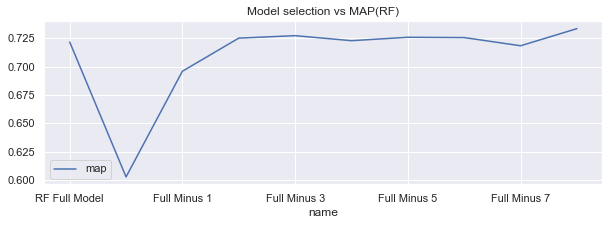

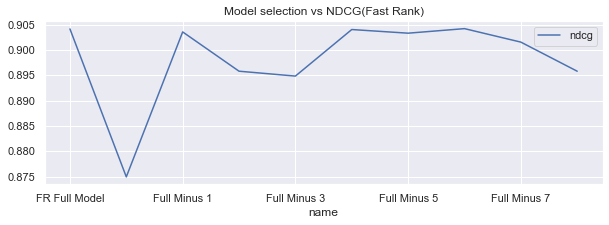

In [282]:
outcome_RF.plot(x='name', y='map' ,figsize=(10,3), grid=True, title = "Model selection vs MAP(RF)")
outcome_FastRank.plot(x='name', y='ndcg' ,figsize=(10,3), grid=True, title = "Model selection vs NDCG(Fast Rank)")

In [84]:
#Selecting other feature sets
#minus 2, 3, 5, 6 ,7, 8
ltr_feats2 = bm25 >> pt.text.get_text(index_ref, ["shoeName", "brand", "retailPrice","Colorway"]) >> (
    pt.transformer.IdentityTransformer()
    ** # sequential dependence
    #KLQueryExpansion
    (KLQE >> bm25)
    ** # score of text for query 'running'
    (pt.text.scorer(body_attr="retailPrice", takes='docs', wmodel='BM25') ) 
)

In [85]:
#Selecting other feature sets
#minus 1, 7
ltr_feats3 = bm25 >> pt.text.get_text(index_ref, ["shoeName", "brand", "retailPrice","Colorway"]) >> (
    pt.transformer.IdentityTransformer()
    ** # score of text for query 'running'
    (pt.apply.query(lambda row: 'running') >> bm25)
    ** 
    (pt.apply.query(lambda row: 'running') >> tfidf)
    ** # score of title (not originally indexed)
    (pt.text.scorer(body_attr="retailPrice", takes='docs', wmodel='BM25') ) 
    ** # Colorway Blue
    (pt.apply.doc_score(lambda row: int("blue" in row["Colorway"])))
    ** # Colorway Yellow
    (pt.apply.doc_score(lambda row: int("yellow" in row["Colorway"])))
    ** # abstract coordinate match
    pt.BatchRetrieve(index, wmodel="CoordinateMatch")
)

In [86]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400, verbose=1, random_state=SEED, n_jobs=2)

rf_pipe_minus235678 = ltr_feats2 >> pt.ltr.apply_learned_model(rf)
# rf_pipe_minus17 = ltr_feats3 >> pt.ltr.apply_learned_model(rf)

%time rf_pipe_minus235678.fit(train_topics, qrels)
# %time rf_pipe_minus17.fit(train_topics, qrels)

22:07:38.469 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyterrier/ops.py:241: UserWarning: Got number of results different expected from ComposedPipeline(QueryExpansion(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,3,10,<org.terrier.querying.QueryExpansion at 0x7fe86b0282c0 jclass=org/terrier/querying/QueryExpansion jself=<LocalRef obj=0x7fe8682934b8 at 0x7fe84ce55170>>), BR(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDeco

CPU times: user 6.06 s, sys: 141 ms, total: 6.2 s
Wall time: 4.85 s


[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    1.3s finished


In [87]:
import fastrank

train_request = fastrank.TrainRequest.coordinate_ascent()

params = train_request.params
params.init_random = True
params.normalize = True
params.seed = 12345

ca_pipe_minus235678 = ltr_feats2 >> pt.ltr.apply_learned_model(train_request, form='fastrank')
# ca_pipe_minus17 = ltr_feats3 >> pt.ltr.apply_learned_model(train_request, form='fastrank')

%time ca_pipe_minus235678.fit(train_topics, qrels)
# %time ca_pipe_minus17.fit(train_topics, qrels)

22:07:43.406 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyterrier/ops.py:241: UserWarning: Got number of results different expected from ComposedPipeline(QueryExpansion(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,3,10,<org.terrier.querying.QueryExpansion at 0x7fe86b0282c0 jclass=org/terrier/querying/QueryExpansion jself=<LocalRef obj=0x7fe8682934b8 at 0x7fe84ce55170>>), BR(/Users/joshuach100/Desktop/SI 650/Project/shoedoc_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDeco

---------------------------
Training starts...
---------------------------
[+] Random restart #1/5...
[+] Random restart #3/5...
[+] Random restart #2/5...
[+] Random restart #4/5...
[+] Random restart #5/5...
Shuffle features and optimize!
----------------------------------------
   4|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
----------------------------------------
   0|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
----------------------------------------
   3|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
----------------------------------------
   2|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
----------------------------------------
   1|Feature         |   Weight|     NDCG
----------------------------------------
   0|2         

In [93]:
pt.Experiment(
    [tfidf, bm25, pl2, pipelineQE, ca_pipe, rf_pipe, ca_pipe_minus235678, rf_pipe_minus235678],
    test_topics,
    qrels,
    names = ['TFIDF','BM25', 'pl2', 'QEthroughBM25','FastRank','RF','FR_tuned1','RF_tuned1'],
    eval_metrics=["map", "ndcg",nDCG@10,"mrt"])

22:11:34.527 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
22:11:38.300 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished


22:11:41.578 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
22:11:43.203 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished


,name,map,ndcg,nDCG@10,mrt
0,TFIDF,0.886948,0.909415,0.820130,67.691751
1,BM25,0.906230,0.919917,0.818390,66.295345
2,pl2,0.897201,0.912674,0.825558,66.599177
3,QEthroughBM25,0.787627,0.901157,0.830329,138.279299
4,FastRank,0.867394,0.911268,0.821546,757.976520
5,RF,0.738233,0.842087,0.683890,794.267995
6,FR_tuned1,0.844560,0.910719,0.825610,325.153341
7,RF_tuned1,0.760255,0.858594,0.691483,349.063862


In [89]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400, verbose=1, random_state=SEED, n_jobs=2)


rf_pipe_minus17 = ltr_feats3 >> pt.ltr.apply_learned_model(rf)


%time rf_pipe_minus17.fit(train_topics, qrels)

22:08:04.983 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.5s


CPU times: user 8.64 s, sys: 218 ms, total: 8.86 s
Wall time: 8.01 s


[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    1.1s finished


In [90]:
import fastrank

train_request = fastrank.TrainRequest.coordinate_ascent()

params = train_request.params
params.init_random = True
params.normalize = True
params.seed = 12345

ca_pipe_minus17 = ltr_feats3 >> pt.ltr.apply_learned_model(train_request, form='fastrank')

%time ca_pipe_minus17.fit(train_topics, qrels)

22:08:12.953 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
---------------------------
Training starts...
---------------------------
[+] Random restart #1/5...
[+] Random restart #3/5...
[+] Random restart #4/5...
[+] Random restart #5/5...
[+] Random restart #2/5...
Shuffle features and optimize!
----------------------------------------
   2|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
----------------------------------------
   0|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
----------------------------------------
   4|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
------------

   3|2               |   -0.004|    0.784
   3|2               |   -1.042|    0.787
   4|1               |    0.034|    0.789
   4|1               |    0.037|    0.790
   4|1               |    0.043|    0.790
   0|4               | 1761.367|    0.789
   4|4               |    0.000|    0.790
   1|1               |   -0.003|    0.785
   1|1               |   -0.003|    0.785
   1|1               |   -0.003|    0.785
   1|1               |   -0.532|    0.788
   4|4               |    0.000|    0.790
   2|0               |    0.050|    0.775
   2|0               |    0.150|    0.776
   2|0               |    0.350|    0.782
   2|0               |    0.750|    0.782
   2|0               |    6.350|    0.784
   1|2               |    0.005|    0.788
   1|2               |    0.056|    0.789
   1|2               |    0.109|    0.790
---------------------------
Shuffle features and optimize!
----------------------------------------
   1|Feature         |   Weight|     NDCG
------------------

In [92]:
pt.Experiment(
    [tfidf, bm25, pl2, pipelineQE, ca_pipe, rf_pipe, ca_pipe_minus17, rf_pipe_minus17],
    test_topics,
    qrels,
    names = ['TFIDF','BM25', 'pl2', 'QEthroughBM25','FastRank','RF','FR_tuned2','RF_tuned2'],
    eval_metrics=["map", "ndcg",nDCG@10,"mrt"])

22:11:16.738 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
22:11:20.665 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished


22:11:24.378 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
22:11:27.739 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished


,name,map,ndcg,nDCG@10,mrt
0,TFIDF,0.886948,0.909415,0.820130,68.115893
1,BM25,0.906230,0.919917,0.818390,66.101880
2,pl2,0.897201,0.912674,0.825558,64.508748
3,QEthroughBM25,0.787627,0.901157,0.830329,139.402771
4,FastRank,0.867394,0.911268,0.821546,787.772848
5,RF,0.738233,0.842087,0.683890,808.574608
6,FR_tuned2,0.887636,0.917034,0.819530,657.175174
7,RF_tuned2,0.721922,0.840072,0.699775,691.652960


Since the features that we selected did not perform well, let's try out only using the BM25 code score and TF-IDF code score, and only adding  the coordinate match score for the query:

In [100]:
ltr_feats4 = bm25>>(pt.transformer.IdentityTransformer()**tfidf**pt.BatchRetrieve(index, wmodel="CoordinateMatch"))

In [101]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400, verbose=1, random_state=SEED, n_jobs=2)
rf_pipe_bm25fidfandCM = ltr_feats4 >> pt.ltr.apply_learned_model(rf)

%time rf_pipe_bm25fidfandCM.fit(train_topics, qrels)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s


CPU times: user 5.72 s, sys: 124 ms, total: 5.85 s
Wall time: 4.23 s


[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    1.2s finished


In [102]:
import fastrank

train_request = fastrank.TrainRequest.coordinate_ascent()

params = train_request.params
params.init_random = True
params.normalize = True
params.seed = 12345

ca_pipe_bm25fidfandCM = ltr_feats4 >> pt.ltr.apply_learned_model(train_request, form='fastrank')

%time ca_pipe_bm25fidfandCM.fit(train_topics, qrels)

---------------------------
Training starts...
---------------------------
[+] Random restart #1/5...
[+] Random restart #3/5...
[+] Random restart #2/5...
[+] Random restart #4/5...
[+] Random restart #5/5...
Shuffle features and optimize!
----------------------------------------
   0|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
----------------------------------------
   1|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
----------------------------------------
   3|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
----------------------------------------
   2|Feature         |   Weight|     NDCG
----------------------------------------
Shuffle features and optimize!
----------------------------------------
   4|Feature         |   Weight|     NDCG
----------------------------------------
   3|0         

In [104]:
model_last = pt.Experiment(
    [tfidf, bm25, pl2, pipelineQE, ca_pipe,  rf_pipe, ca_pipe_bm25fidfandCM, rf_pipe_bm25fidfandCM],
    test_topics,
    qrels,
    names = ['TFIDF','BM25', 'pl2', 'QEthroughBM25','FastRank', 'RF','FR_bm25fidfandCM' ,'RF_bm25fidfandCM'],
    eval_metrics=["map", "ndcg",nDCG@10,"mrt"])
model_last

22:16:49.806 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.
22:16:54.280 [main] WARN org.terrier.querying.ApplyTermPipeline - The index has no termpipelines configuration, and no control configuration is found. Defaulting to global termpipelines configuration of 'Stopwords,PorterStemmer'. Set a termpipelines control to remove this warning.


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished


,name,map,ndcg,nDCG@10,mrt
0,TFIDF,0.886948,0.909415,0.820130,67.642956
1,BM25,0.906230,0.919917,0.818390,67.407983
2,pl2,0.897201,0.912674,0.825558,66.618935
3,QEthroughBM25,0.787627,0.901157,0.830329,143.112677
4,FastRank,0.867394,0.911268,0.821546,824.821304
5,RF,0.738233,0.842087,0.683890,1013.774788
6,FR_bm25fidfandCM,0.920570,0.927039,0.828458,348.109765
7,RF_bm25fidfandCM,0.781314,0.836156,0.667397,398.219288


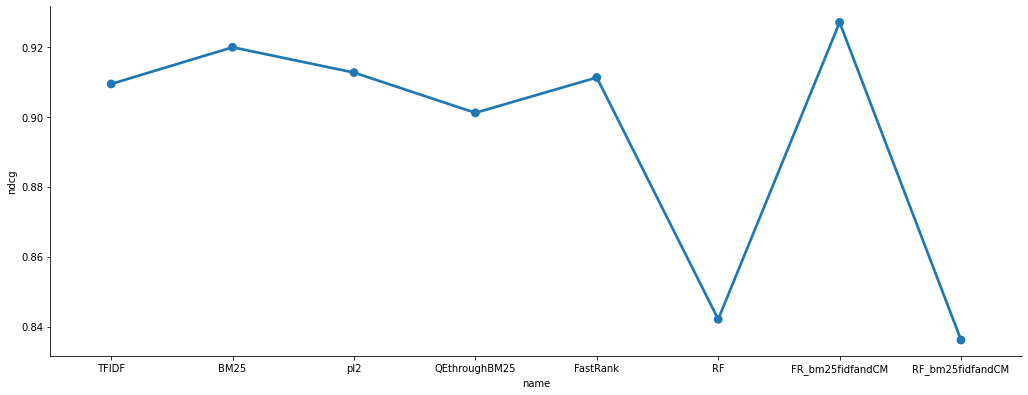

In [105]:
from matplotlib import pyplot as plt
import seaborn as sns


g = sns.catplot(x="name", y="ndcg", data=model_last, kind='point')
g.fig.set_figwidth(18.27)
g.fig.set_figheight(5.7)

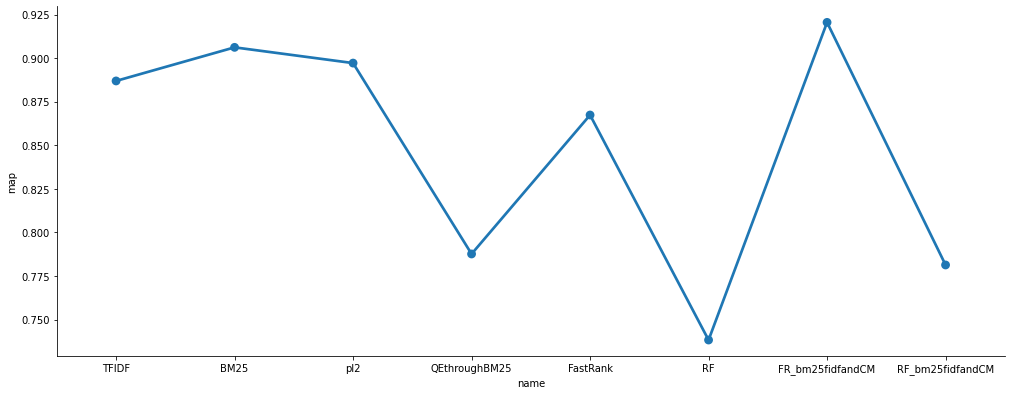

In [106]:
g = sns.catplot(x="name", y="map", data=model_last, kind='point')
g.fig.set_figwidth(18.27)
g.fig.set_figheight(5.7)

# Train KNRM models

The code below is trianed on greatlakes

In [91]:
# Index MS MARCO
#Implementation of the K-NRM model
import onir_pt
knrm = onir_pt.reranker('knrm', 'wordvec_hash')

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.
config file not found: config
[2022-12-16 16:34:22,601][WordvecHashVocab][DEBUG] [starting] reading cached at /home/joshch/data/onir/vocab/wordvec_hash/fasttext-wiki-news-300d-1M.p
[2022-12-16 16:34:29,976][WordvecHashVocab][DEBUG] [finished] reading cached at /home/joshch/data/onir/vocab/wordvec_hash/fasttext-wiki-news-300d-1M.p [7.39s]


In [95]:
pipeline1 = (pt.BatchRetrieve(index, wmodel="TF_IDF") 
             >> pt.text.get_text(index_ref, ['text']) # fetch the document text
             >> knrm) # apply neural re-ranker

pipeline2 = (pt.BatchRetrieve(index, wmodel = "BM25") 
            >> pt.text.get_text(index_ref, ['text']) # fetch the document text
            >> knrm) # apply neural re-ranker

In [96]:
pipeline1.fit(
    train_topics,
    qrels,
    valid_topics,
    qrels)

[2022-12-16 16:35:21,394][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:35:21,477][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:35:50,167][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:36:09,585][onir_pt][DEBUG] [finished] batches: [19.42s] [1000it] [51.51it/s]
[2022-12-16 16:36:09,610][onir_pt][DEBUG] [finished] validation [48.22s]
[2022-12-16 16:36:09,612][onir_pt][INFO] pre-validation: 0.0059
[2022-12-16 16:36:09,666][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:09,668][onir_pt][DEBUG] [starting] training
[2022-12-16 16:36:09,669][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:36:12,627][onir_pt][DEBUG] [finished] train pairs: [2.96s] [1024it] [346.41it/s]


[2022-12-16 16:36:12,631][onir_pt][DEBUG] [finished] training [2.96s]
[2022-12-16 16:36:12,632][onir_pt][INFO] training   it=0 loss=0.2202
[2022-12-16 16:36:12,633][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:36:12,634][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:12,635][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:36:13,771][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [882.23it/s]
[2022-12-16 16:36:13,793][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:36:13,815][onir_pt][INFO] validation it=0 map=0.0072 ndcg=0.0727 P_10=0.0000 <--
[2022-12-16 16:36:13,817][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:13,818][onir_pt][DEBUG] [starting] training
[2022-12-16 16:36:13,819][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:36:16,447][onir_pt][DEBUG] [finished] train pairs: [2.62s] [1024it] [390.11it/s]


[2022-12-16 16:36:16,450][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:36:16,451][onir_pt][INFO] training   it=1 loss=0.2120
[2022-12-16 16:36:16,452][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:36:16,453][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:16,454][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:36:17,591][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [881.87it/s]
[2022-12-16 16:36:17,612][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:36:17,614][onir_pt][INFO] validation it=1 map=0.0075 ndcg=0.0732 P_10=0.0050 <--
[2022-12-16 16:36:17,615][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:17,617][onir_pt][DEBUG] [starting] training
[2022-12-16 16:36:17,618][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:36:20,243][onir_pt][DEBUG] [finished] train pairs: [2.62s] [1024it] [390.46it/s]


[2022-12-16 16:36:20,246][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:36:20,247][onir_pt][INFO] training   it=2 loss=0.2004
[2022-12-16 16:36:20,248][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:36:20,250][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:20,251][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:36:21,390][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [880.18it/s]
[2022-12-16 16:36:21,411][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:36:21,414][onir_pt][INFO] validation it=2 map=0.0075 ndcg=0.0731 P_10=0.0050
[2022-12-16 16:36:21,415][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:21,416][onir_pt][DEBUG] [starting] training
[2022-12-16 16:36:21,417][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:36:24,043][onir_pt][DEBUG] [finished] train pairs: [2.62s] [1024it] [390.37it/s]


[2022-12-16 16:36:24,047][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:36:24,048][onir_pt][INFO] training   it=3 loss=0.2000
[2022-12-16 16:36:24,049][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:36:24,050][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:24,052][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:36:25,187][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [882.76it/s]
[2022-12-16 16:36:25,208][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:36:25,212][onir_pt][INFO] validation it=3 map=0.0076 ndcg=0.0732 P_10=0.0050 <--
[2022-12-16 16:36:25,213][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:25,214][onir_pt][DEBUG] [starting] training
[2022-12-16 16:36:25,215][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:36:27,842][onir_pt][DEBUG] [finished] train pairs: [2.62s] [1024it] [390.16it/s]


[2022-12-16 16:36:27,846][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:36:27,847][onir_pt][INFO] training   it=4 loss=0.2170
[2022-12-16 16:36:27,848][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:36:27,849][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:27,850][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:36:28,988][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [881.21it/s]
[2022-12-16 16:36:29,009][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:36:29,010][onir_pt][INFO] validation it=4 map=0.0073 ndcg=0.0730 P_10=0.0050
[2022-12-16 16:36:29,011][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:29,012][onir_pt][DEBUG] [starting] training
[2022-12-16 16:36:29,014][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:36:31,639][onir_pt][DEBUG] [finished] train pairs: [2.62s] [1024it] [390.50it/s]


[2022-12-16 16:36:31,642][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:36:31,644][onir_pt][INFO] training   it=5 loss=0.2116
[2022-12-16 16:36:31,644][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:36:31,645][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:31,647][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:36:32,784][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [881.49it/s]
[2022-12-16 16:36:32,806][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:36:32,807][onir_pt][INFO] validation it=5 map=0.0074 ndcg=0.0731 P_10=0.0000
[2022-12-16 16:36:32,808][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:32,809][onir_pt][DEBUG] [starting] training
[2022-12-16 16:36:32,810][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:36:35,435][onir_pt][DEBUG] [finished] train pairs: [2.62s] [1024it] [390.45it/s]


[2022-12-16 16:36:35,439][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:36:35,440][onir_pt][INFO] training   it=6 loss=0.2073
[2022-12-16 16:36:35,441][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:36:35,442][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:35,443][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:36:36,581][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [881.45it/s]
[2022-12-16 16:36:36,602][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:36:36,603][onir_pt][INFO] validation it=6 map=0.0074 ndcg=0.0731 P_10=0.0050
[2022-12-16 16:36:36,604][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:36,606][onir_pt][DEBUG] [starting] training
[2022-12-16 16:36:36,607][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:36:39,232][onir_pt][DEBUG] [finished] train pairs: [2.62s] [1024it] [390.34it/s]


[2022-12-16 16:36:39,236][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:36:39,237][onir_pt][INFO] training   it=7 loss=0.1987
[2022-12-16 16:36:39,238][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:36:39,239][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:39,240][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:36:40,376][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [882.66it/s]
[2022-12-16 16:36:40,397][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:36:40,399][onir_pt][INFO] validation it=7 map=0.0101 ndcg=0.0780 P_10=0.0050 <--
[2022-12-16 16:36:40,400][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:40,402][onir_pt][DEBUG] [starting] training
[2022-12-16 16:36:40,403][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:36:43,028][onir_pt][DEBUG] [finished] train pairs: [2.62s] [1024it] [390.41it/s]


[2022-12-16 16:36:43,031][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:36:43,033][onir_pt][INFO] training   it=8 loss=0.1178
[2022-12-16 16:36:43,033][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:36:43,035][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:43,036][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:36:44,173][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [881.05it/s]
[2022-12-16 16:36:44,195][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:36:44,196][onir_pt][INFO] validation it=8 map=0.0458 ndcg=0.1106 P_10=0.0600 <--
[2022-12-16 16:36:44,198][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:44,199][onir_pt][DEBUG] [starting] training
[2022-12-16 16:36:44,200][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:36:46,825][onir_pt][DEBUG] [finished] train pairs: [2.62s] [1024it] [390.40it/s]


[2022-12-16 16:36:46,829][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:36:46,830][onir_pt][INFO] training   it=9 loss=0.0868
[2022-12-16 16:36:46,831][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:36:46,832][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:46,834][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:36:47,970][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [881.72it/s]
[2022-12-16 16:36:47,992][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:36:47,993][onir_pt][INFO] validation it=9 map=0.0543 ndcg=0.1172 P_10=0.0700 <--
[2022-12-16 16:36:47,994][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:47,996][onir_pt][DEBUG] [starting] training
[2022-12-16 16:36:47,997][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:36:50,625][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.95it/s]


[2022-12-16 16:36:50,629][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:36:50,630][onir_pt][INFO] training   it=10 loss=0.0819
[2022-12-16 16:36:50,631][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:36:50,632][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:50,633][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:36:51,773][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [879.35it/s]
[2022-12-16 16:36:51,796][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:36:51,800][onir_pt][INFO] validation it=10 map=0.0613 ndcg=0.1232 P_10=0.0900 <--
[2022-12-16 16:36:51,801][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:51,806][onir_pt][DEBUG] [starting] training
[2022-12-16 16:36:51,808][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:36:54,473][onir_pt][DEBUG] [finished] train pairs: [2.66s] [1024it] [385.00it/s]


[2022-12-16 16:36:54,477][onir_pt][DEBUG] [finished] training [2.67s]
[2022-12-16 16:36:54,478][onir_pt][INFO] training   it=11 loss=0.0960
[2022-12-16 16:36:54,479][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:36:54,480][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:54,482][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:36:55,619][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [880.97it/s]
[2022-12-16 16:36:55,640][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:36:55,643][onir_pt][INFO] validation it=11 map=0.0605 ndcg=0.1227 P_10=0.0850
[2022-12-16 16:36:55,646][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:55,647][onir_pt][DEBUG] [starting] training
[2022-12-16 16:36:55,648][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:36:58,274][onir_pt][DEBUG] [finished] train pairs: [2.62s] [1024it] [390.22it/s]


[2022-12-16 16:36:58,278][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:36:58,279][onir_pt][INFO] training   it=12 loss=0.0872
[2022-12-16 16:36:58,280][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:36:58,281][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:58,282][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:36:59,422][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [879.11it/s]
[2022-12-16 16:36:59,444][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:36:59,446][onir_pt][INFO] validation it=12 map=0.0626 ndcg=0.1244 P_10=0.0750 <--
[2022-12-16 16:36:59,447][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:36:59,448][onir_pt][DEBUG] [starting] training
[2022-12-16 16:36:59,449][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:02,080][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.54it/s]


[2022-12-16 16:37:02,084][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:37:02,085][onir_pt][INFO] training   it=13 loss=0.0874
[2022-12-16 16:37:02,086][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:02,087][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:02,089][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:37:03,231][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [877.64it/s]
[2022-12-16 16:37:03,252][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:37:03,253][onir_pt][INFO] validation it=13 map=0.0570 ndcg=0.1200 P_10=0.0850
[2022-12-16 16:37:03,254][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:03,256][onir_pt][DEBUG] [starting] training
[2022-12-16 16:37:03,257][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:05,882][onir_pt][DEBUG] [finished] train pairs: [2.62s] [1024it] [390.35it/s]


[2022-12-16 16:37:05,886][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:37:05,887][onir_pt][INFO] training   it=14 loss=0.0828
[2022-12-16 16:37:05,888][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:05,889][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:05,890][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:37:07,028][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [880.71it/s]
[2022-12-16 16:37:07,050][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:37:07,051][onir_pt][INFO] validation it=14 map=0.0604 ndcg=0.1225 P_10=0.0850
[2022-12-16 16:37:07,052][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:07,053][onir_pt][DEBUG] [starting] training
[2022-12-16 16:37:07,054][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:09,689][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.07it/s]


[2022-12-16 16:37:09,692][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:37:09,693][onir_pt][INFO] training   it=15 loss=0.0873
[2022-12-16 16:37:09,695][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:09,696][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:09,697][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:37:10,841][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [875.68it/s]
[2022-12-16 16:37:10,863][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:37:10,864][onir_pt][INFO] validation it=15 map=0.0597 ndcg=0.1218 P_10=0.0800
[2022-12-16 16:37:10,865][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:10,866][onir_pt][DEBUG] [starting] training
[2022-12-16 16:37:10,867][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:13,497][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.70it/s]


[2022-12-16 16:37:13,501][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:37:13,502][onir_pt][INFO] training   it=16 loss=0.0978
[2022-12-16 16:37:13,503][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:13,504][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:13,505][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:37:14,643][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [881.02it/s]
[2022-12-16 16:37:14,665][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:37:14,667][onir_pt][INFO] validation it=16 map=0.0649 ndcg=0.1255 P_10=0.1000 <--
[2022-12-16 16:37:14,668][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:14,670][onir_pt][DEBUG] [starting] training
[2022-12-16 16:37:14,670][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:17,296][onir_pt][DEBUG] [finished] train pairs: [2.62s] [1024it] [390.30it/s]


[2022-12-16 16:37:17,300][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:37:17,301][onir_pt][INFO] training   it=17 loss=0.0783
[2022-12-16 16:37:17,302][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:17,303][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:17,305][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:37:18,442][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [881.51it/s]
[2022-12-16 16:37:18,463][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:37:18,464][onir_pt][INFO] validation it=17 map=0.0647 ndcg=0.1254 P_10=0.0950
[2022-12-16 16:37:18,465][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:18,467][onir_pt][DEBUG] [starting] training
[2022-12-16 16:37:18,468][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:21,101][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.14it/s]


[2022-12-16 16:37:21,105][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:37:21,106][onir_pt][INFO] training   it=18 loss=0.0795
[2022-12-16 16:37:21,107][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:21,108][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:21,119][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:37:22,255][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [882.41it/s]
[2022-12-16 16:37:22,277][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:37:22,279][onir_pt][INFO] validation it=18 map=0.0655 ndcg=0.1253 P_10=0.0950 <--
[2022-12-16 16:37:22,280][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:22,282][onir_pt][DEBUG] [starting] training
[2022-12-16 16:37:22,283][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:24,936][onir_pt][DEBUG] [finished] train pairs: [2.65s] [1024it] [386.32it/s]


[2022-12-16 16:37:24,939][onir_pt][DEBUG] [finished] training [2.66s]
[2022-12-16 16:37:24,940][onir_pt][INFO] training   it=19 loss=0.0679
[2022-12-16 16:37:24,941][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:24,942][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:24,944][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:37:26,090][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [874.78it/s]
[2022-12-16 16:37:26,113][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:37:26,115][onir_pt][INFO] validation it=19 map=0.0641 ndcg=0.1247 P_10=0.1000
[2022-12-16 16:37:26,119][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:26,121][onir_pt][DEBUG] [starting] training
[2022-12-16 16:37:26,124][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:28,771][onir_pt][DEBUG] [finished] train pairs: [2.64s] [1024it] [387.64it/s]


[2022-12-16 16:37:28,774][onir_pt][DEBUG] [finished] training [2.65s]
[2022-12-16 16:37:28,775][onir_pt][INFO] training   it=20 loss=0.0691
[2022-12-16 16:37:28,777][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:28,778][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:28,779][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:37:29,915][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [881.91it/s]
[2022-12-16 16:37:29,937][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:37:29,939][onir_pt][INFO] validation it=20 map=0.0664 ndcg=0.1261 P_10=0.0950 <--
[2022-12-16 16:37:29,940][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:29,941][onir_pt][DEBUG] [starting] training
[2022-12-16 16:37:29,942][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:32,573][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.60it/s]


[2022-12-16 16:37:32,577][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:37:32,578][onir_pt][INFO] training   it=21 loss=0.0729
[2022-12-16 16:37:32,579][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:32,580][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:32,582][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:37:33,717][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [882.69it/s]
[2022-12-16 16:37:33,738][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:37:33,740][onir_pt][INFO] validation it=21 map=0.0748 ndcg=0.1262 P_10=0.0900 <--
[2022-12-16 16:37:33,741][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:33,742][onir_pt][DEBUG] [starting] training
[2022-12-16 16:37:33,743][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:36,440][onir_pt][DEBUG] [finished] train pairs: [2.69s] [1024it] [380.07it/s]


[2022-12-16 16:37:36,443][onir_pt][DEBUG] [finished] training [2.70s]
[2022-12-16 16:37:36,444][onir_pt][INFO] training   it=22 loss=0.0619
[2022-12-16 16:37:36,446][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:36,447][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:36,448][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:37:37,584][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [882.26it/s]
[2022-12-16 16:37:37,606][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:37:37,607][onir_pt][INFO] validation it=22 map=0.0736 ndcg=0.1260 P_10=0.0950
[2022-12-16 16:37:37,608][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:37,609][onir_pt][DEBUG] [starting] training
[2022-12-16 16:37:37,610][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:40,237][onir_pt][DEBUG] [finished] train pairs: [2.62s] [1024it] [390.25it/s]


[2022-12-16 16:37:40,240][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:37:40,241][onir_pt][INFO] training   it=23 loss=0.0707
[2022-12-16 16:37:40,243][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:40,244][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:40,245][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:37:41,384][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [879.77it/s]
[2022-12-16 16:37:41,405][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:37:41,407][onir_pt][INFO] validation it=23 map=0.0652 ndcg=0.1252 P_10=0.0900
[2022-12-16 16:37:41,408][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:41,409][onir_pt][DEBUG] [starting] training
[2022-12-16 16:37:41,410][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:44,047][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [388.73it/s]


[2022-12-16 16:37:44,050][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:37:44,051][onir_pt][INFO] training   it=24 loss=0.0630
[2022-12-16 16:37:44,052][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:44,053][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:44,054][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:37:45,195][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [879.38it/s]
[2022-12-16 16:37:45,218][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:37:45,220][onir_pt][INFO] validation it=24 map=0.0728 ndcg=0.1270 P_10=0.0900
[2022-12-16 16:37:45,221][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:45,222][onir_pt][DEBUG] [starting] training
[2022-12-16 16:37:45,224][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:47,851][onir_pt][DEBUG] [finished] train pairs: [2.62s] [1024it] [390.11it/s]


[2022-12-16 16:37:47,854][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:37:47,856][onir_pt][INFO] training   it=25 loss=0.0652
[2022-12-16 16:37:47,857][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:47,858][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:47,859][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:37:49,000][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [878.35it/s]
[2022-12-16 16:37:49,021][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:37:49,024][onir_pt][INFO] validation it=25 map=0.0711 ndcg=0.1257 P_10=0.0850
[2022-12-16 16:37:49,025][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:49,026][onir_pt][DEBUG] [starting] training
[2022-12-16 16:37:49,027][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:51,656][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.92it/s]


[2022-12-16 16:37:51,660][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:37:51,661][onir_pt][INFO] training   it=26 loss=0.0621
[2022-12-16 16:37:51,662][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:51,663][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:51,664][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:37:52,801][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [882.02it/s]
[2022-12-16 16:37:52,822][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:37:52,825][onir_pt][INFO] validation it=26 map=0.0735 ndcg=0.1269 P_10=0.0850
[2022-12-16 16:37:52,826][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:52,828][onir_pt][DEBUG] [starting] training
[2022-12-16 16:37:52,829][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:55,550][onir_pt][DEBUG] [finished] train pairs: [2.72s] [1024it] [376.66it/s]


[2022-12-16 16:37:55,553][onir_pt][DEBUG] [finished] training [2.73s]
[2022-12-16 16:37:55,554][onir_pt][INFO] training   it=27 loss=0.0657
[2022-12-16 16:37:55,556][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:55,557][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:55,567][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:37:56,705][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [880.86it/s]
[2022-12-16 16:37:56,726][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:37:56,727][onir_pt][INFO] validation it=27 map=0.0724 ndcg=0.1273 P_10=0.0900
[2022-12-16 16:37:56,728][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:56,730][onir_pt][DEBUG] [starting] training
[2022-12-16 16:37:56,731][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:37:59,359][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [390.02it/s]


[2022-12-16 16:37:59,362][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:37:59,363][onir_pt][INFO] training   it=28 loss=0.0644
[2022-12-16 16:37:59,364][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:37:59,365][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:37:59,366][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:00,505][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [880.20it/s]
[2022-12-16 16:38:00,527][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:38:00,530][onir_pt][INFO] validation it=28 map=0.0712 ndcg=0.1280 P_10=0.0950
[2022-12-16 16:38:00,531][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:00,533][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:00,534][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:38:03,162][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.93it/s]


[2022-12-16 16:38:03,166][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:38:03,167][onir_pt][INFO] training   it=29 loss=0.0635
[2022-12-16 16:38:03,168][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:03,169][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:03,170][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:04,305][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [883.37it/s]
[2022-12-16 16:38:04,326][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:38:04,327][onir_pt][INFO] validation it=29 map=0.0716 ndcg=0.1277 P_10=0.0950
[2022-12-16 16:38:04,328][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:04,330][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:04,331][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:38:06,958][onir_pt][DEBUG] [finished] train pairs: [2.62s] [1024it] [390.21it/s]


[2022-12-16 16:38:06,961][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:38:06,962][onir_pt][INFO] training   it=30 loss=0.0626
[2022-12-16 16:38:06,963][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:06,964][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:06,965][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:08,106][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [879.07it/s]
[2022-12-16 16:38:08,128][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:38:08,131][onir_pt][INFO] validation it=30 map=0.0666 ndcg=0.1255 P_10=0.0900
[2022-12-16 16:38:08,134][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:08,137][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:08,140][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:38:10,773][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.56it/s]


[2022-12-16 16:38:10,776][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:38:10,778][onir_pt][INFO] training   it=31 loss=0.0648
[2022-12-16 16:38:10,779][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:10,780][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:10,781][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:11,923][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [877.45it/s]
[2022-12-16 16:38:11,946][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:38:11,948][onir_pt][INFO] validation it=31 map=0.0724 ndcg=0.1272 P_10=0.0850
[2022-12-16 16:38:11,951][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:11,953][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:11,955][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:38:14,584][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.74it/s]


[2022-12-16 16:38:14,588][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:38:14,589][onir_pt][INFO] training   it=32 loss=0.0593
[2022-12-16 16:38:14,590][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:14,591][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:14,592][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:15,730][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [881.54it/s]
[2022-12-16 16:38:15,751][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:38:15,753][onir_pt][INFO] validation it=32 map=0.0701 ndcg=0.1265 P_10=0.0950
[2022-12-16 16:38:15,754][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:15,755][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:15,756][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:38:18,404][onir_pt][DEBUG] [finished] train pairs: [2.65s] [1024it] [387.04it/s]


[2022-12-16 16:38:18,408][onir_pt][DEBUG] [finished] training [2.65s]
[2022-12-16 16:38:18,409][onir_pt][INFO] training   it=33 loss=0.0700
[2022-12-16 16:38:18,410][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:18,411][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:18,412][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:19,554][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [877.83it/s]
[2022-12-16 16:38:19,578][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:38:19,579][onir_pt][INFO] validation it=33 map=0.0722 ndcg=0.1274 P_10=0.0900
[2022-12-16 16:38:19,583][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:19,587][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:19,589][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:38:22,225][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.12it/s]


[2022-12-16 16:38:22,228][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:38:22,229][onir_pt][INFO] training   it=34 loss=0.0595
[2022-12-16 16:38:22,231][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:22,232][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:22,234][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:23,370][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [881.66it/s]
[2022-12-16 16:38:23,392][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:38:23,395][onir_pt][INFO] validation it=34 map=0.0708 ndcg=0.1265 P_10=0.0850
[2022-12-16 16:38:23,396][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:23,398][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:23,399][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:38:26,037][onir_pt][DEBUG] [finished] train pairs: [2.64s] [1024it] [388.42it/s]


[2022-12-16 16:38:26,041][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:38:26,042][onir_pt][INFO] training   it=35 loss=0.0606
[2022-12-16 16:38:26,043][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:26,044][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:26,045][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:27,187][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [878.36it/s]
[2022-12-16 16:38:27,208][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:38:27,209][onir_pt][INFO] validation it=35 map=0.0737 ndcg=0.1283 P_10=0.0900
[2022-12-16 16:38:27,210][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:27,212][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:27,213][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:38:29,841][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [390.00it/s]


[2022-12-16 16:38:29,844][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:38:29,845][onir_pt][INFO] training   it=36 loss=0.0545
[2022-12-16 16:38:29,847][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:29,848][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:29,849][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:30,987][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [880.85it/s]
[2022-12-16 16:38:31,009][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:38:31,010][onir_pt][INFO] validation it=36 map=0.0685 ndcg=0.1262 P_10=0.0900
[2022-12-16 16:38:31,011][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:31,012][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:31,013][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:38:33,644][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.59it/s]


[2022-12-16 16:38:33,648][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:38:33,648][onir_pt][INFO] training   it=37 loss=0.0544
[2022-12-16 16:38:33,650][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:33,651][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:33,652][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:34,791][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [879.88it/s]
[2022-12-16 16:38:34,812][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:38:34,815][onir_pt][INFO] validation it=37 map=0.0727 ndcg=0.1278 P_10=0.0850
[2022-12-16 16:38:34,816][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:34,818][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:34,819][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:38:37,448][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.78it/s]


[2022-12-16 16:38:37,452][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:38:37,453][onir_pt][INFO] training   it=38 loss=0.0636
[2022-12-16 16:38:37,454][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:37,455][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:37,456][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:38,597][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [878.90it/s]
[2022-12-16 16:38:38,618][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:38:38,621][onir_pt][INFO] validation it=38 map=0.0699 ndcg=0.1266 P_10=0.0900
[2022-12-16 16:38:38,624][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:38,625][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:38,626][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:38:41,254][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.91it/s]


[2022-12-16 16:38:41,258][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:38:41,259][onir_pt][INFO] training   it=39 loss=0.0517
[2022-12-16 16:38:41,260][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:41,261][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:41,263][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:42,402][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [879.65it/s]
[2022-12-16 16:38:42,423][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:38:42,424][onir_pt][INFO] validation it=39 map=0.0727 ndcg=0.1285 P_10=0.0950
[2022-12-16 16:38:42,425][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:42,427][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:42,428][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:38:45,056][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [390.04it/s]


[2022-12-16 16:38:45,059][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:38:45,060][onir_pt][INFO] training   it=40 loss=0.0692
[2022-12-16 16:38:45,062][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:45,063][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:45,064][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:46,202][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [881.00it/s]
[2022-12-16 16:38:46,223][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:38:46,224][onir_pt][INFO] validation it=40 map=0.0716 ndcg=0.1286 P_10=0.0900
[2022-12-16 16:38:46,225][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:46,227][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:46,228][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:38:48,859][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.61it/s]


[2022-12-16 16:38:48,862][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:38:48,863][onir_pt][INFO] training   it=41 loss=0.0640
[2022-12-16 16:38:48,864][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:48,865][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:48,867][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:50,009][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [877.29it/s]
[2022-12-16 16:38:50,032][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:38:50,033][onir_pt][INFO] validation it=41 map=0.0728 ndcg=0.1283 P_10=0.0900
[2022-12-16 16:38:50,036][onir_pt][INFO] early stopping; model reverting back to it=21


In [97]:
pipeline2.fit(
    train_topics,
    qrels,
    valid_topics,
    qrels)

[2022-12-16 16:38:51,017][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:51,019][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:51,021][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:52,170][onir_pt][DEBUG] [finished] batches: [1.15s] [1000it] [871.29it/s]
[2022-12-16 16:38:52,192][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:38:52,195][onir_pt][INFO] pre-validation: 0.0736
[2022-12-16 16:38:52,197][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:52,199][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:52,200][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:38:54,856][onir_pt][DEBUG] [finished] train pairs: [2.65s] [1024it] [385.87it/s]


[2022-12-16 16:38:54,859][onir_pt][DEBUG] [finished] training [2.66s]
[2022-12-16 16:38:54,861][onir_pt][INFO] training   it=0 loss=0.0770
[2022-12-16 16:38:54,862][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:54,863][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:54,864][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:56,009][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [875.65it/s]
[2022-12-16 16:38:56,030][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:38:56,033][onir_pt][INFO] validation it=0 map=0.0679 ndcg=0.1249 P_10=0.0850
[2022-12-16 16:38:56,034][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:56,035][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:56,037][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:38:58,671][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.08it/s]


[2022-12-16 16:38:58,674][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:38:58,675][onir_pt][INFO] training   it=1 loss=0.0714
[2022-12-16 16:38:58,677][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:38:58,678][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:58,680][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:38:59,828][onir_pt][DEBUG] [finished] batches: [1.15s] [1000it] [872.50it/s]
[2022-12-16 16:38:59,852][onir_pt][DEBUG] [finished] validation [1.18s]
[2022-12-16 16:38:59,855][onir_pt][INFO] validation it=1 map=0.0705 ndcg=0.1252 P_10=0.0900
[2022-12-16 16:38:59,856][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:38:59,857][onir_pt][DEBUG] [starting] training
[2022-12-16 16:38:59,858][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:02,519][onir_pt][DEBUG] [finished] train pairs: [2.66s] [1024it] [385.04it/s]


[2022-12-16 16:39:02,523][onir_pt][DEBUG] [finished] training [2.67s]
[2022-12-16 16:39:02,524][onir_pt][INFO] training   it=2 loss=0.0673
[2022-12-16 16:39:02,525][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:02,526][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:02,528][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:39:03,666][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [880.48it/s]
[2022-12-16 16:39:03,687][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:39:03,689][onir_pt][INFO] validation it=2 map=0.0670 ndcg=0.1238 P_10=0.0850
[2022-12-16 16:39:03,690][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:03,691][onir_pt][DEBUG] [starting] training
[2022-12-16 16:39:03,692][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:06,320][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [390.00it/s]


[2022-12-16 16:39:06,324][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:39:06,325][onir_pt][INFO] training   it=3 loss=0.0681
[2022-12-16 16:39:06,326][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:06,327][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:06,329][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:39:07,466][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [880.98it/s]
[2022-12-16 16:39:07,487][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:39:07,489][onir_pt][INFO] validation it=3 map=0.0644 ndcg=0.1227 P_10=0.0900
[2022-12-16 16:39:07,490][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:07,491][onir_pt][DEBUG] [starting] training
[2022-12-16 16:39:07,492][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:10,121][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.82it/s]


[2022-12-16 16:39:10,125][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:39:10,126][onir_pt][INFO] training   it=4 loss=0.0729
[2022-12-16 16:39:10,127][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:10,128][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:10,130][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:39:11,274][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [875.89it/s]
[2022-12-16 16:39:11,298][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:39:11,300][onir_pt][INFO] validation it=4 map=0.0664 ndcg=0.1237 P_10=0.0900
[2022-12-16 16:39:11,304][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:11,306][onir_pt][DEBUG] [starting] training
[2022-12-16 16:39:11,309][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:14,038][onir_pt][DEBUG] [finished] train pairs: [2.72s] [1024it] [375.83it/s]


[2022-12-16 16:39:14,042][onir_pt][DEBUG] [finished] training [2.74s]
[2022-12-16 16:39:14,043][onir_pt][INFO] training   it=5 loss=0.0592
[2022-12-16 16:39:14,044][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:14,045][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:14,047][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:39:15,186][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [879.52it/s]
[2022-12-16 16:39:15,208][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:39:15,209][onir_pt][INFO] validation it=5 map=0.0658 ndcg=0.1233 P_10=0.0900
[2022-12-16 16:39:15,210][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:15,212][onir_pt][DEBUG] [starting] training
[2022-12-16 16:39:15,213][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:17,843][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.58it/s]


[2022-12-16 16:39:17,847][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:39:17,848][onir_pt][INFO] training   it=6 loss=0.0766
[2022-12-16 16:39:17,849][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:17,850][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:17,852][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:39:18,990][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [880.63it/s]
[2022-12-16 16:39:19,012][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:39:19,013][onir_pt][INFO] validation it=6 map=0.0658 ndcg=0.1221 P_10=0.0800
[2022-12-16 16:39:19,014][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:19,016][onir_pt][DEBUG] [starting] training
[2022-12-16 16:39:19,016][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:21,649][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.32it/s]


[2022-12-16 16:39:21,653][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:39:21,654][onir_pt][INFO] training   it=7 loss=0.0744
[2022-12-16 16:39:21,655][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:21,656][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:21,657][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:39:22,794][onir_pt][DEBUG] [finished] batches: [1.13s] [1000it] [881.57it/s]
[2022-12-16 16:39:22,816][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:39:22,817][onir_pt][INFO] validation it=7 map=0.0680 ndcg=0.1234 P_10=0.0900
[2022-12-16 16:39:22,818][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:22,819][onir_pt][DEBUG] [starting] training
[2022-12-16 16:39:22,820][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:25,481][onir_pt][DEBUG] [finished] train pairs: [2.66s] [1024it] [385.15it/s]


[2022-12-16 16:39:25,485][onir_pt][DEBUG] [finished] training [2.67s]
[2022-12-16 16:39:25,486][onir_pt][INFO] training   it=8 loss=0.0731
[2022-12-16 16:39:25,487][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:25,488][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:25,489][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:39:26,631][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [877.99it/s]
[2022-12-16 16:39:26,652][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:39:26,654][onir_pt][INFO] validation it=8 map=0.0631 ndcg=0.1238 P_10=0.0900
[2022-12-16 16:39:26,655][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:26,656][onir_pt][DEBUG] [starting] training
[2022-12-16 16:39:26,657][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:29,299][onir_pt][DEBUG] [finished] train pairs: [2.64s] [1024it] [387.97it/s]


[2022-12-16 16:39:29,303][onir_pt][DEBUG] [finished] training [2.65s]
[2022-12-16 16:39:29,304][onir_pt][INFO] training   it=9 loss=0.0696
[2022-12-16 16:39:29,305][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:29,306][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:29,308][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:39:30,456][onir_pt][DEBUG] [finished] batches: [1.15s] [1000it] [872.85it/s]
[2022-12-16 16:39:30,478][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:39:30,481][onir_pt][INFO] validation it=9 map=0.0646 ndcg=0.1232 P_10=0.0850
[2022-12-16 16:39:30,482][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:30,487][onir_pt][DEBUG] [starting] training
[2022-12-16 16:39:30,490][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:33,188][onir_pt][DEBUG] [finished] train pairs: [2.69s] [1024it] [380.25it/s]


[2022-12-16 16:39:33,191][onir_pt][DEBUG] [finished] training [2.70s]
[2022-12-16 16:39:33,192][onir_pt][INFO] training   it=10 loss=0.0598
[2022-12-16 16:39:33,194][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:33,195][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:33,196][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:39:34,335][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [879.92it/s]
[2022-12-16 16:39:34,357][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:39:34,358][onir_pt][INFO] validation it=10 map=0.0706 ndcg=0.1241 P_10=0.0850
[2022-12-16 16:39:34,359][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:34,361][onir_pt][DEBUG] [starting] training
[2022-12-16 16:39:34,362][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:36,995][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.27it/s]


[2022-12-16 16:39:36,998][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:39:36,999][onir_pt][INFO] training   it=11 loss=0.0688
[2022-12-16 16:39:37,000][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:37,001][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:37,003][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:39:38,142][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [879.84it/s]
[2022-12-16 16:39:38,164][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:39:38,165][onir_pt][INFO] validation it=11 map=0.0691 ndcg=0.1236 P_10=0.0850
[2022-12-16 16:39:38,166][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:38,168][onir_pt][DEBUG] [starting] training
[2022-12-16 16:39:38,169][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:40,798][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.77it/s]


[2022-12-16 16:39:40,802][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:39:40,803][onir_pt][INFO] training   it=12 loss=0.0608
[2022-12-16 16:39:40,804][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:40,805][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:40,806][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:39:41,946][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [879.81it/s]
[2022-12-16 16:39:41,967][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:39:41,970][onir_pt][INFO] validation it=12 map=0.0729 ndcg=0.1252 P_10=0.0850
[2022-12-16 16:39:41,971][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:41,973][onir_pt][DEBUG] [starting] training
[2022-12-16 16:39:41,974][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:44,602][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [390.02it/s]


[2022-12-16 16:39:44,605][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:39:44,606][onir_pt][INFO] training   it=13 loss=0.0673
[2022-12-16 16:39:44,607][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:44,608][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:44,610][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:39:45,753][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [877.02it/s]
[2022-12-16 16:39:45,776][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:39:45,778][onir_pt][INFO] validation it=13 map=0.0722 ndcg=0.1256 P_10=0.0850
[2022-12-16 16:39:45,781][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:45,784][onir_pt][DEBUG] [starting] training
[2022-12-16 16:39:45,785][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:48,436][onir_pt][DEBUG] [finished] train pairs: [2.64s] [1024it] [387.27it/s]


[2022-12-16 16:39:48,440][onir_pt][DEBUG] [finished] training [2.66s]
[2022-12-16 16:39:48,441][onir_pt][INFO] training   it=14 loss=0.0671
[2022-12-16 16:39:48,442][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:48,443][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:48,445][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:39:49,584][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [879.53it/s]
[2022-12-16 16:39:49,605][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:39:49,608][onir_pt][INFO] validation it=14 map=0.0666 ndcg=0.1228 P_10=0.0800
[2022-12-16 16:39:49,609][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:49,610][onir_pt][DEBUG] [starting] training
[2022-12-16 16:39:49,611][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:52,242][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.61it/s]


[2022-12-16 16:39:52,245][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:39:52,246][onir_pt][INFO] training   it=15 loss=0.0708
[2022-12-16 16:39:52,248][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:52,249][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:52,251][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:39:53,389][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [879.85it/s]
[2022-12-16 16:39:53,411][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:39:53,412][onir_pt][INFO] validation it=15 map=0.0728 ndcg=0.1247 P_10=0.0800
[2022-12-16 16:39:53,413][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:53,414][onir_pt][DEBUG] [starting] training
[2022-12-16 16:39:53,415][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:56,058][onir_pt][DEBUG] [finished] train pairs: [2.64s] [1024it] [387.86it/s]


[2022-12-16 16:39:56,061][onir_pt][DEBUG] [finished] training [2.65s]
[2022-12-16 16:39:56,062][onir_pt][INFO] training   it=16 loss=0.0714
[2022-12-16 16:39:56,064][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:56,065][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:56,066][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:39:57,206][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [878.75it/s]
[2022-12-16 16:39:57,228][onir_pt][DEBUG] [finished] validation [1.16s]
[2022-12-16 16:39:57,229][onir_pt][INFO] validation it=16 map=0.0725 ndcg=0.1243 P_10=0.0800
[2022-12-16 16:39:57,230][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:57,232][onir_pt][DEBUG] [starting] training
[2022-12-16 16:39:57,233][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:39:59,861][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [389.90it/s]


[2022-12-16 16:39:59,865][onir_pt][DEBUG] [finished] training [2.63s]
[2022-12-16 16:39:59,866][onir_pt][INFO] training   it=17 loss=0.0684
[2022-12-16 16:39:59,867][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:39:59,868][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:39:59,869][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:40:01,015][onir_pt][DEBUG] [finished] batches: [1.14s] [1000it] [874.67it/s]
[2022-12-16 16:40:01,038][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:40:01,040][onir_pt][INFO] validation it=17 map=0.0725 ndcg=0.1244 P_10=0.0800
[2022-12-16 16:40:01,044][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:40:01,046][onir_pt][DEBUG] [starting] training
[2022-12-16 16:40:01,049][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:40:03,693][onir_pt][DEBUG] [finished] train pairs: [2.64s] [1024it] [388.02it/s]


[2022-12-16 16:40:03,697][onir_pt][DEBUG] [finished] training [2.65s]
[2022-12-16 16:40:03,698][onir_pt][INFO] training   it=18 loss=0.0644
[2022-12-16 16:40:03,699][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:40:03,700][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:40:03,701][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:40:04,853][onir_pt][DEBUG] [finished] batches: [1.15s] [1000it] [869.84it/s]
[2022-12-16 16:40:04,875][onir_pt][DEBUG] [finished] validation [1.18s]
[2022-12-16 16:40:04,876][onir_pt][INFO] validation it=18 map=0.0726 ndcg=0.1244 P_10=0.0850
[2022-12-16 16:40:04,877][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:40:04,878][onir_pt][DEBUG] [starting] training
[2022-12-16 16:40:04,879][onir_pt][DEBUG] [starting] train pairs


[2022-12-16 16:40:07,514][onir_pt][DEBUG] [finished] train pairs: [2.63s] [1024it] [388.99it/s]


[2022-12-16 16:40:07,518][onir_pt][DEBUG] [finished] training [2.64s]
[2022-12-16 16:40:07,519][onir_pt][INFO] training   it=19 loss=0.0598
[2022-12-16 16:40:07,520][onir_pt][DEBUG] [starting] validation
[2022-12-16 16:40:07,522][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:40:07,523][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:40:08,671][onir_pt][DEBUG] [finished] batches: [1.15s] [1000it] [872.75it/s]
[2022-12-16 16:40:08,694][onir_pt][DEBUG] [finished] validation [1.17s]
[2022-12-16 16:40:08,697][onir_pt][INFO] validation it=19 map=0.0724 ndcg=0.1247 P_10=0.0850
[2022-12-16 16:40:08,700][onir_pt][INFO] early stopping; model reverting back to it=-1


In [99]:
pt.Experiment(
    [pipeline1, pipeline2],
    test_topics,
    qrels,
    names=['tfidf_knrm ','BM25_knrm'],
    eval_metrics=["map", "ndcg", 'ndcg_cut.10', 'P.10', 'mrt']
)

[2022-12-16 16:42:41,387][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:42:41,389][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:42:42,805][onir_pt][DEBUG] [finished] batches: [1.41s] [1250it] [884.30it/s]
[2022-12-16 16:42:43,170][onir_pt][DEBUG] using GPU (deterministic)
[2022-12-16 16:42:43,171][onir_pt][DEBUG] [starting] batches


[2022-12-16 16:42:44,583][onir_pt][DEBUG] [finished] batches: [1.41s] [1250it] [886.70it/s]


,name,map,ndcg,ndcg_cut.10,P.10,mrt
0,tfidf_knrm,0.461642,0.746470,0.505223,0.62,355.138989
1,BM25_knrm,0.470001,0.762811,0.561049,0.70,352.502868
